In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import  MinMaxScaler
import warnings
from feature_engine.outliers import Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

warnings.filterwarnings("ignore")

In [375]:
data=pd.read_csv("project_data_final.csv")

In [376]:
data.head()

,Customer_id,First_name,Last_name,Country,Gender,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,...,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus,Should_Receive_Bonus,withdraw_frequency
0,606778,Tammy,Robinson,Mexico,Female,69,76,3,45124,4340,...,49,32.0,61621.0,54.0,719.0,4312.0,217.0,20241.0,0,Weekly
1,882088,Timothy,Smith,Argentina,Male,41,70,7,36256,30174,...,50,24.0,14323.0,39.0,402.0,4291.0,332.0,16955.0,0,Weekly
2,823104,Mary,Mckinney,Mexico,Female,51,20,5,31652,7685,...,54,20.0,58136.0,46.0,307.0,2858.0,281.0,25409.0,0,Weekly
3,243455,Sarah,White,India,Female,38,77,19,29271,844,...,7,32.0,38810.0,37.0,423.0,2534.0,273.0,21905.0,1,Monthly
4,485861,Edward,Stephenson,Brazil,Male,51,16,13,44007,3476,...,48,29.0,54909.0,48.0,460.0,2200.0,360.0,26404.0,1,Weekly


In [377]:
data.shape

(5000, 21)

In [379]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_id                       5000 non-null   int64  
 1   First_name                        5000 non-null   object 
 2   Last_name                         5000 non-null   object 
 3   Country                           5000 non-null   object 
 4   Gender                            5000 non-null   object 
 5   Age                               5000 non-null   int64  
 6   Winning_percentage                5000 non-null   int64  
 7   Days_Since_Last_Bet               5000 non-null   int64  
 8   Income_Level_(k)                  5000 non-null   int64  
 9   Total_Amount_wagered              5000 non-null   int64  
 10  Average_Bet_Amount                5000 non-null   float64
 11  Active_Days                       5000 non-null   int64  
 12  Total_

Type Casting (convertig customer_id datatype from int to object)

In [380]:
data["Customer_id"]=data["Customer_id"].astype("object")

Partitioning the dataset based on feature type, separating numerical and categorical attributes.

In [381]:
numerical_data = data.select_dtypes(exclude="object")
numerical_features = data.select_dtypes(exclude="object").columns

In [382]:
categorical_data = data.select_dtypes(include="object")
categorical_features = data.select_dtypes(include="object").columns

In [383]:
numerical_data.shape

(5000, 15)

In [384]:
categorical_data.shape

(5000, 6)

In [385]:
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               5000 non-null   int64  
 1   Winning_percentage                5000 non-null   int64  
 2   Days_Since_Last_Bet               5000 non-null   int64  
 3   Income_Level_(k)                  5000 non-null   int64  
 4   Total_Amount_wagered              5000 non-null   int64  
 5   Average_Bet_Amount                5000 non-null   float64
 6   Active_Days                       5000 non-null   int64  
 7   Total_Number_of_Bets              5000 non-null   float64
 8   Total_Amount_Wagered              5000 non-null   float64
 9   Number_of_Bonuses_Received        5000 non-null   float64
 10  Amount_of_Bonuses_Received        5000 non-null   float64
 11  Revenue_from_Bonuses              5000 non-null   float64
 12  Increa

Finding the correlation between the numerical data

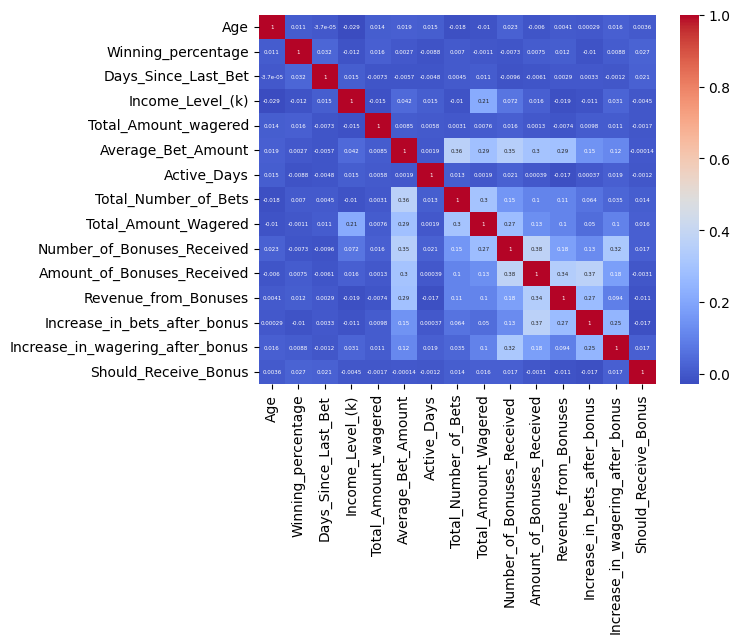

<Figure size 3000x3000 with 0 Axes>

In [386]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm',annot_kws={"size":4}) 
plt.figure(figsize=(30,30))
plt.savefig('./images/numerical_heatmap.png')
plt.show()


In [388]:
numerical_data.corr()

,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus,Should_Receive_Bonus
Age,1.000000,0.010541,-0.000037,-0.028714,0.013800,0.018716,0.015212,-0.018160,-0.010491,0.022749,-0.006005,0.004057,0.000293,0.015865,0.003613
Winning_percentage,0.010541,1.000000,0.032247,-0.011507,0.015971,0.002692,-0.008765,0.007037,-0.001103,-0.007285,0.007520,0.012072,-0.010443,0.008844,0.026760
Days_Since_Last_Bet,-0.000037,0.032247,1.000000,0.014909,-0.007276,-0.005707,-0.004842,0.004544,0.010973,-0.009638,-0.006094,0.002900,0.003340,-0.001162,0.021008
Income_Level_(k),-0.028714,-0.011507,0.014909,1.000000,-0.015389,0.042236,0.014999,-0.010498,0.213769,0.071734,0.016474,-0.019265,-0.010589,0.031200,-0.004536
Total_Amount_wagered,0.013800,0.015971,-0.007276,-0.015389,1.000000,0.008498,0.005770,0.003117,0.007601,0.015589,0.001271,-0.007378,0.009818,0.011250,-0.001722
Average_Bet_Amount,0.018716,0.002692,-0.005707,0.042236,0.008498,1.000000,0.001920,0.363510,0.285743,0.349365,0.297350,0.291838,0.146248,0.119366,-0.000139
Active_Days,0.015212,-0.008765,-0.004842,0.014999,0.005770,0.001920,1.000000,0.012892,0.001946,0.020529,0.000390,-0.016991,0.000366,0.018524,-0.001155
Total_Number_of_Bets,-0.018160,0.007037,0.004544,-0.010498,0.003117,0.363510,0.012892,1.000000,0.298436,0.153475,0.104134,0.105442,0.064016,0.035234,0.013517
Total_Amount_Wagered,-0.010491,-0.001103,0.010973,0.213769,0.007601,0.285743,0.001946,0.298436,1.000000,0.273910,0.132397,0.104712,0.049765,0.100093,0.015849
Number_of_Bonuses_Received,0.022749,-0.007285,-0.009638,0.071734,0.015589,0.349365,0.020529,0.153475,0.273910,1.000000,0.376634,0.181352,0.127933,0.320354,0.017124


In [389]:
numerical_data.describe()

,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus,Should_Receive_Bonus
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,44.273800,41.624200,20.116000,30025.93380,13784.493200,485.654800,85.626000,27.199200,49902.334800,47.700400,529.671200,2542.148800,277.254400,24852.814400,0.454200
std,15.255038,21.624239,11.159061,10224.29491,13322.014734,141.720135,123.353676,6.586577,12227.120941,12.043905,134.111149,743.108048,63.574108,6850.996112,0.497948
min,18.000000,5.000000,1.000000,20002.00000,104.000000,10.000000,3.000000,1.000000,100.000000,1.000000,10.000000,10.000000,30.000000,100.000000,0.000000
25%,31.000000,23.000000,10.000000,22938.75000,4142.750000,389.000000,9.000000,23.000000,41838.000000,40.000000,443.000000,2052.750000,235.000000,20201.000000,0.000000
50%,44.500000,42.000000,20.000000,27019.50000,9899.000000,487.000000,45.000000,27.000000,49705.500000,48.000000,531.000000,2542.500000,276.000000,24939.000000,0.000000
75%,57.000000,60.000000,30.000000,33707.00000,18801.000000,578.000000,53.000000,32.000000,57931.000000,56.000000,619.000000,3043.000000,320.000000,29385.500000,1.000000
max,70.000000,79.000000,39.000000,150000.00000,100000.000000,1000.000000,354.000000,50.000000,100000.000000,100.000000,1000.000000,5000.000000,500.000000,50000.000000,1.000000


In [390]:
numerical_data.skew(axis=0, skipna=True)

Age                                -0.018554
Winning_percentage                  0.009693
Days_Since_Last_Bet                -0.026214
Income_Level_(k)                    2.385034
Total_Amount_wagered                1.855705
Average_Bet_Amount                  0.024664
Active_Days                         1.425057
Total_Number_of_Bets                0.074814
Total_Amount_Wagered                0.022904
Number_of_Bonuses_Received          0.033854
Amount_of_Bonuses_Received         -0.075399
Revenue_from_Bonuses               -0.017182
Increase_in_bets_after_bonus        0.006037
Increase_in_wagering_after_bonus    0.008996
Should_Receive_Bonus                0.184029
dtype: float64

In [373]:
numerical_data.kurtosis(axis=0,skipna=True)

Age                                -1.267664
Winning_percentage                 -1.194291
Days_Since_Last_Bet                -1.132985
Income_Level_(k)                    5.379796
Total_Amount_wagered                4.175241
Average_Bet_Amount                  0.353901
Active_Days                        -1.641483
Total_Number_of_Bets                0.143142
Total_Amount_Wagered                0.178557
Number_of_Bonuses_Received          0.157424
Amount_of_Bonuses_Received         -0.062696
Revenue_from_Bonuses                0.168849
Increase_in_bets_after_bonus       -0.170197
Increase_in_wagering_after_bonus   -0.287337
Should_Receive_Bonus               -1.745063
dtype: float64

Handling Duplicates

In [391]:
numerical_data.duplicated().sum()

0

In [392]:
categorical_data.duplicated().sum()

0

This data doesnot contain any duplicate after considering both the numerical and categorical data

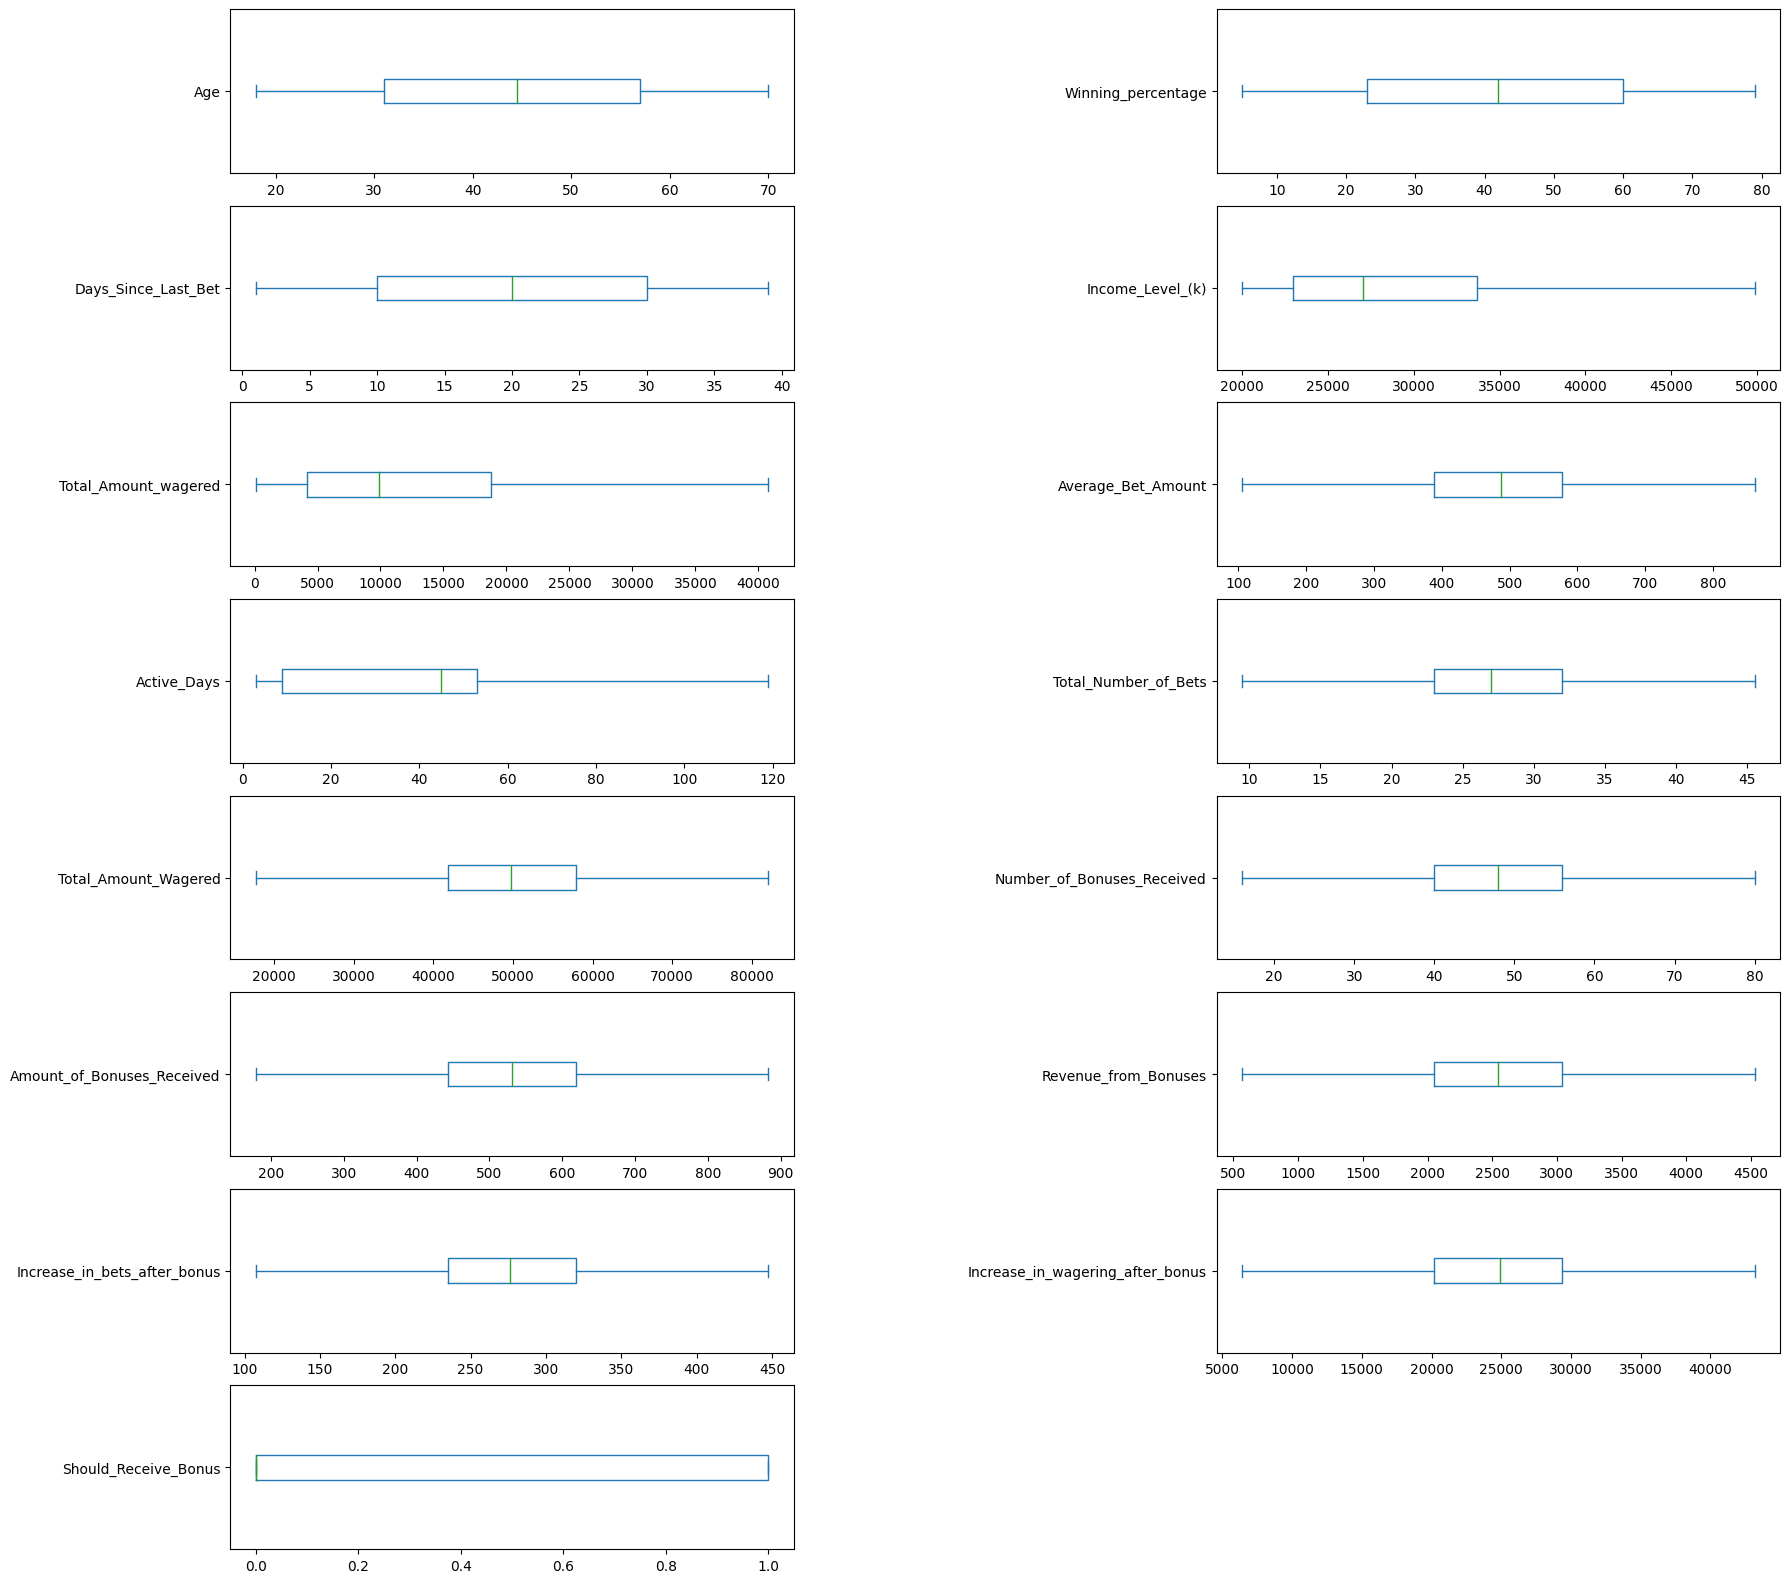

In [488]:
numerical_data.plot(kind = 'box', subplots = True,sharey=False, vert =0,sharex = False,layout = [8,2], figsize=(20,20)) 
plt.subplots_adjust(wspace = 0.75) 
plt.savefig('./images/numerical_data_boxplot.png')
plt.show()


In [482]:
numerical_data.columns

Index(['Age', 'Winning_percentage', 'Days_Since_Last_Bet', 'Income_Level_(k)',
       'Total_Amount_wagered', 'Average_Bet_Amount', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_bets_after_bonus',
       'Increase_in_wagering_after_bonus', 'Should_Receive_Bonus'],
      dtype='object')

In [483]:
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Age', 'Winning_percentage', 'Days_Since_Last_Bet', 'Income_Level_(k)',
       'Total_Amount_wagered', 'Average_Bet_Amount', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_bets_after_bonus',
       'Increase_in_wagering_after_bonus'])


In [484]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['Age', 'Winning_percentage',
                                       'Days_Since_Last_Bet',
                                       'Income_Level_(k)',
                                       'Total_Amount_wagered',
                                       'Average_Bet_Amount', 'Active_Days',
                                       'Total_Number_of_Bets',
                                       'Total_Amount_Wagered',
                                       'Number_of_Bonuses_Received',
                                       'Amount_of_Bonuses_Received',
                                       'Revenue_from_Bonuses',
                                       'Increase_in_bets_after_bonus',
                                       'Increase_in_wagering_after_bonus']))])

In [485]:
preprocessor1 = ColumnTransformer(transformers = [('wins', 
                                                   outlier_pipeline,
                                                   numerical_data.columns)], 
                                  remainder = 'passthrough')

In [486]:
winz_data = preprocessor1.fit(numerical_data)

In [487]:
numerical_data = pd.DataFrame(winz_data.transform(numerical_data), columns = numerical_data.columns).convert_dtypes()


After considering the below code the we get to know that there are no columns with the same entries throughout 

In [489]:
numerical_data.var()

Age                                 2.327162e+02
Winning_percentage                  4.676077e+02
Days_Since_Last_Bet                 1.245246e+02
Income_Level_(k)                    6.762661e+07
Total_Amount_wagered                1.272583e+08
Average_Bet_Amount                  1.971064e+04
Active_Days                         1.754622e+03
Total_Number_of_Bets                4.280928e+01
Total_Amount_Wagered                1.467194e+08
Number_of_Bonuses_Received          1.427621e+02
Amount_of_Bonuses_Received          1.758176e+04
Revenue_from_Bonuses                5.440741e+05
Increase_in_bets_after_bonus        3.992741e+03
Increase_in_wagering_after_bonus    4.636319e+07
Should_Receive_Bonus                2.479520e-01
dtype: float64

In [490]:
categorical_data.columns

Index(['Customer_id', 'First_name', 'Last_name', 'Country', 'Gender',
       'withdraw_frequency'],
      dtype='object')

Perform ordinal encoding for withdraw_frequency features

In [491]:
categorical_data["withdraw_frequency"].value_counts()

withdraw_frequency
Monthly         1589
Weekly          1504
Daily           1009
Occasionally     682
No               216
Name: count, dtype: int64

In [397]:
mapping = {"Rarely/Never":1,"Daily":2,"Weekly":3,"Monthly":4}

In [398]:
withdraw_frequency = categorical_data["withdraw_frequency"].map(mapping)

In [399]:
withdraw_frequency.head()

0    3.0
1    3.0
2    3.0
3    4.0
4    3.0
Name: withdraw_frequency, dtype: float64

In [401]:
type(withdraw_frequency)

pandas.core.series.Series

Perform Imputation Technique both for numerical and categorical data

In [499]:
numerical_imputer = SimpleImputer(strategy = "mean")
categorical_imputer = SimpleImputer(strategy = "most_frequent")

In [500]:

numerical_data_1 = numerical_imputer.fit_transform(numerical_data)
categorical_data_1 = categorical_imputer.fit_transform(categorical_data)


In [501]:
numerical_data_1 = pd.DataFrame(numerical_data_1,columns = numerical_features)
categorical_data_1 = pd.DataFrame(categorical_data_1, columns = categorical_features)

In [502]:
numerical_data_2 = pd.concat([numerical_data_1,withdraw_frequency],axis = 1)



In [503]:
numerical_data_2.head()

,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus,Should_Receive_Bonus,withdraw_frequency
0,69.0,76.0,3.0,45124.0,4340.0,600.0,49.0,32.0,61621.0,54.0,719.0,4312.0,217.0,20241.0,0.0,3.0
1,41.0,70.0,7.0,36256.0,30174.0,472.0,50.0,24.0,17698.5,39.0,402.0,4291.0,332.0,16955.0,0.0,3.0
2,51.0,20.0,5.0,31652.0,7685.0,546.0,54.0,20.0,58136.0,46.0,307.0,2858.0,281.0,25409.0,0.0,3.0
3,38.0,77.0,19.0,29271.0,844.0,243.0,7.0,32.0,38810.0,37.0,423.0,2534.0,273.0,21905.0,1.0,4.0
4,51.0,16.0,13.0,44007.0,3476.0,653.0,48.0,29.0,54909.0,48.0,460.0,2200.0,360.0,26404.0,1.0,3.0


In [504]:
categorical_data_part = categorical_data_1[["Country","Gender", "withdraw_frequency"]]

Proportion of count data on categorical columns

In [505]:
for col in categorical_data_part:
    print(categorical_data_part[col].value_counts(normalize=True)*100)
    print("________________________________________________________")

Country
Argentina    25.74
Mexico       25.28
India        24.92
Brazil       24.06
Name: proportion, dtype: float64
________________________________________________________
Gender
Male      50.04
Female    49.96
Name: proportion, dtype: float64
________________________________________________________
withdraw_frequency
Monthly         31.78
Weekly          30.08
Daily           20.18
Occasionally    13.64
No               4.32
Name: proportion, dtype: float64
________________________________________________________


Univariate Analysis for Numerical Data

In [506]:
len(numerical_features)

15

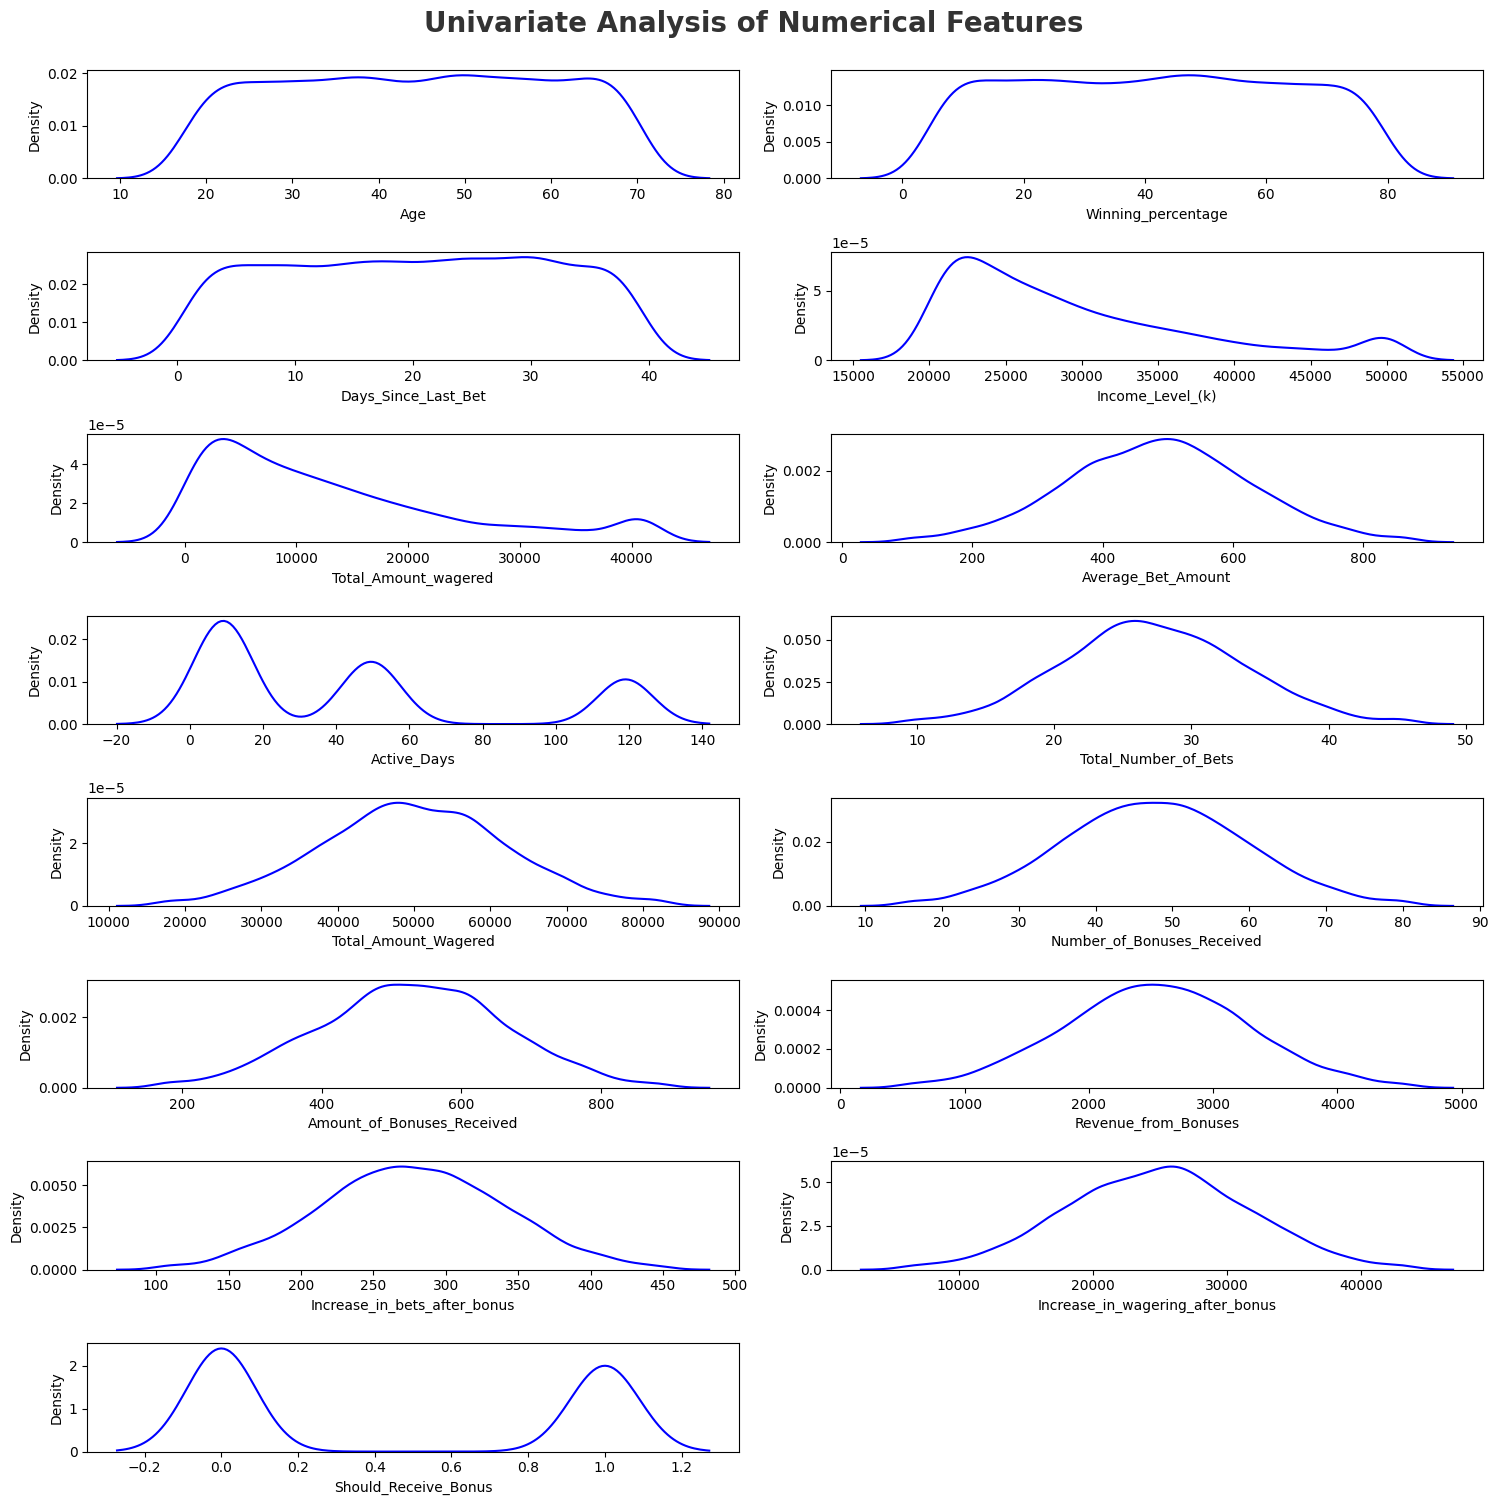

In [507]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)


for i in range(0, len(numerical_features)):
    plt.subplot(8, 2, i+1)
    sns.kdeplot(x=numerical_data[numerical_features[i]], color='blue')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()
plt.savefig("./images/Univariate_Numerical.png")

Univariate Analysis for categorical features 

In [508]:
categorical_features_1 = categorical_data_part.columns

In [509]:
len(categorical_features_1)

3

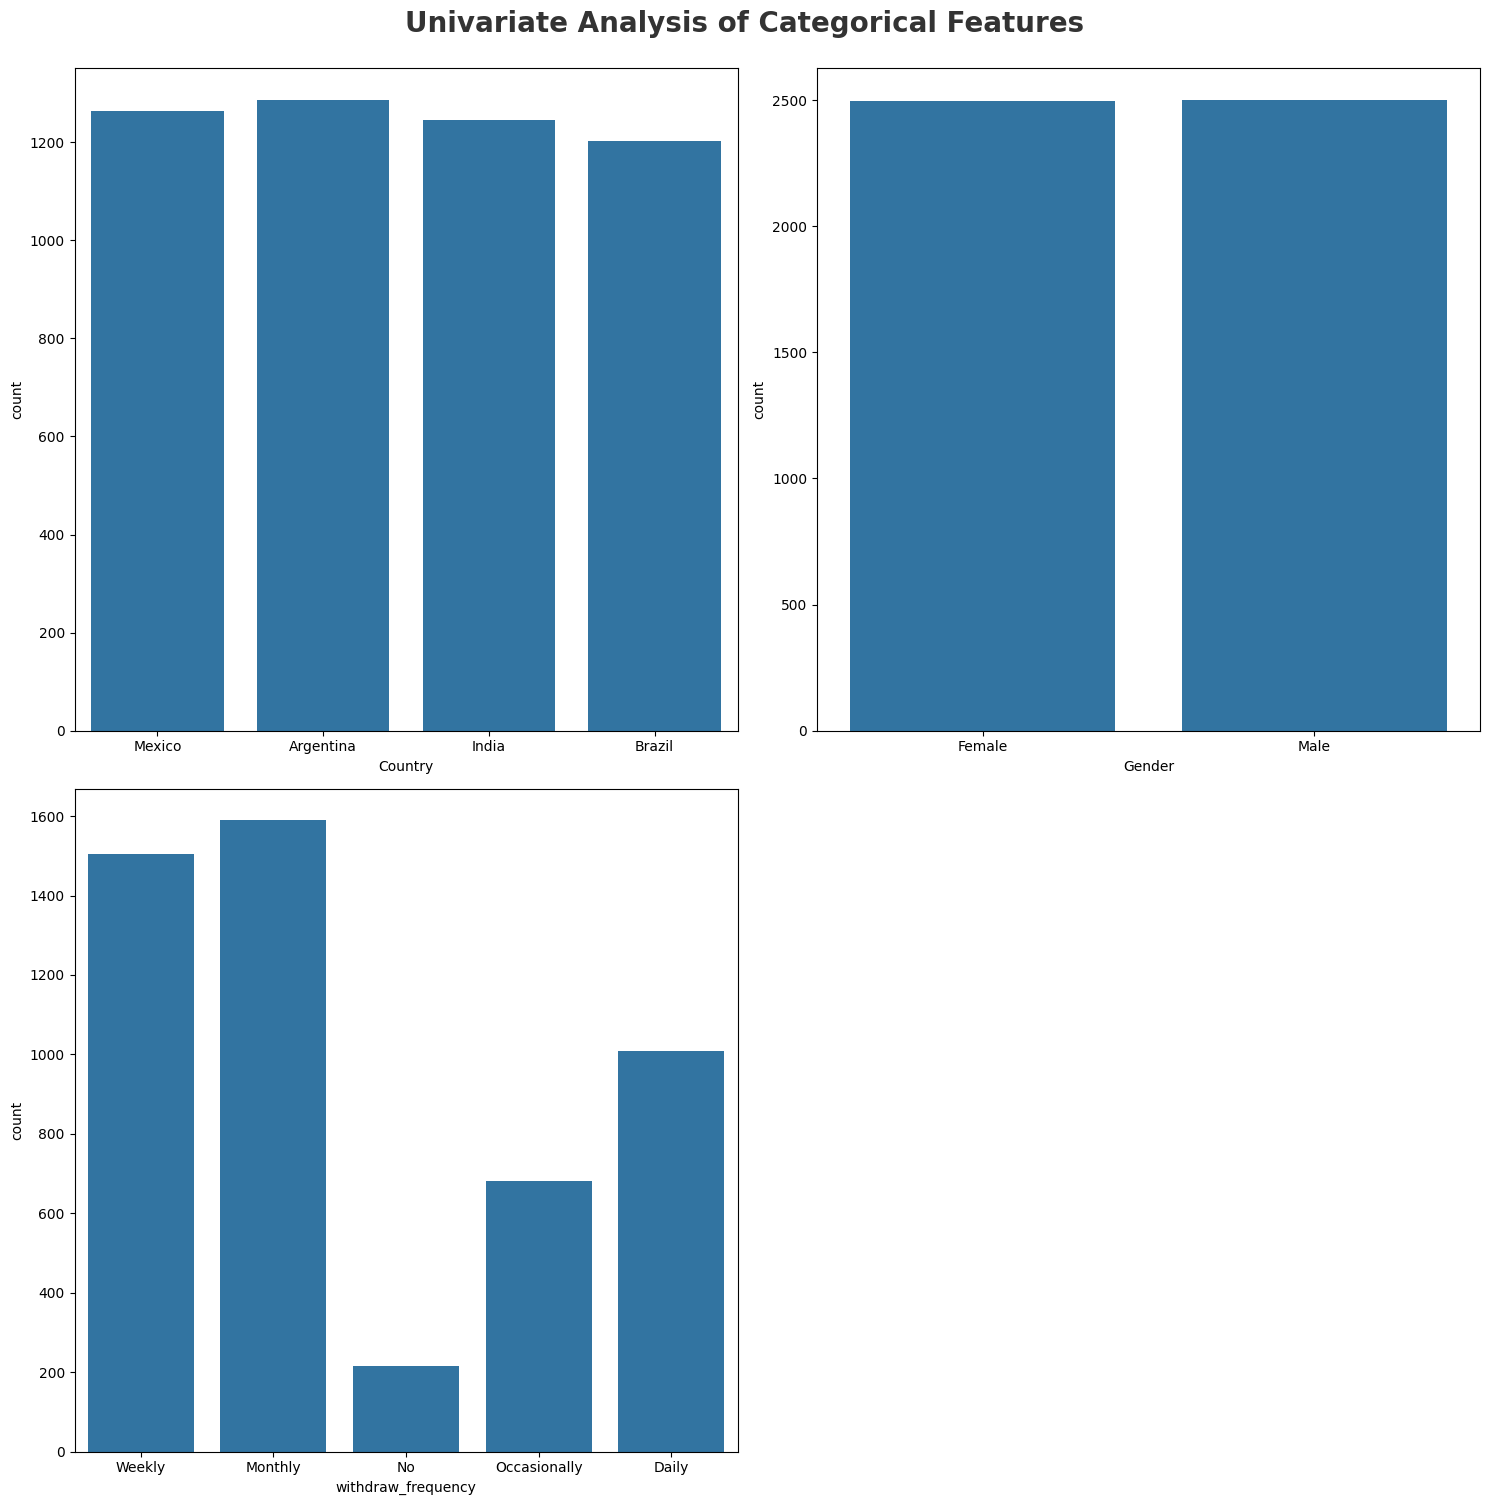

In [510]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features_1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=categorical_data_part[categorical_features_1[i]])
    plt.xlabel(categorical_features_1[i])
    plt.tight_layout()
plt.savefig("./images/Univariate_categorical.png")
    

In [511]:
numerical_data.columns

Index(['Age', 'Winning_percentage', 'Days_Since_Last_Bet', 'Income_Level_(k)',
       'Total_Amount_wagered', 'Average_Bet_Amount', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_bets_after_bonus',
       'Increase_in_wagering_after_bonus', 'Should_Receive_Bonus'],
      dtype='object')

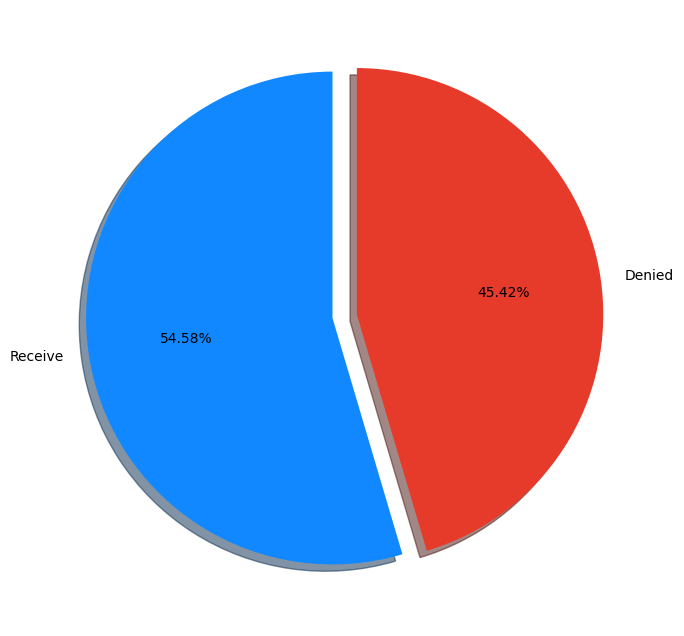

In [512]:
percentage = numerical_data["Should_Receive_Bonus"].value_counts(normalize=True)
labels = ["Receive","Denied"]

fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.savefig("./images/Visualize_Target_Feature")
plt.show()

In [513]:
data.columns

Index(['Customer_id', 'First_name', 'Last_name', 'Country', 'Gender', 'Age',
       'Winning_percentage', 'Days_Since_Last_Bet', 'Income_Level_(k)',
       'Total_Amount_wagered', 'Average_Bet_Amount', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_bets_after_bonus',
       'Increase_in_wagering_after_bonus', 'Should_Receive_Bonus',
       'withdraw_frequency'],
      dtype='object')

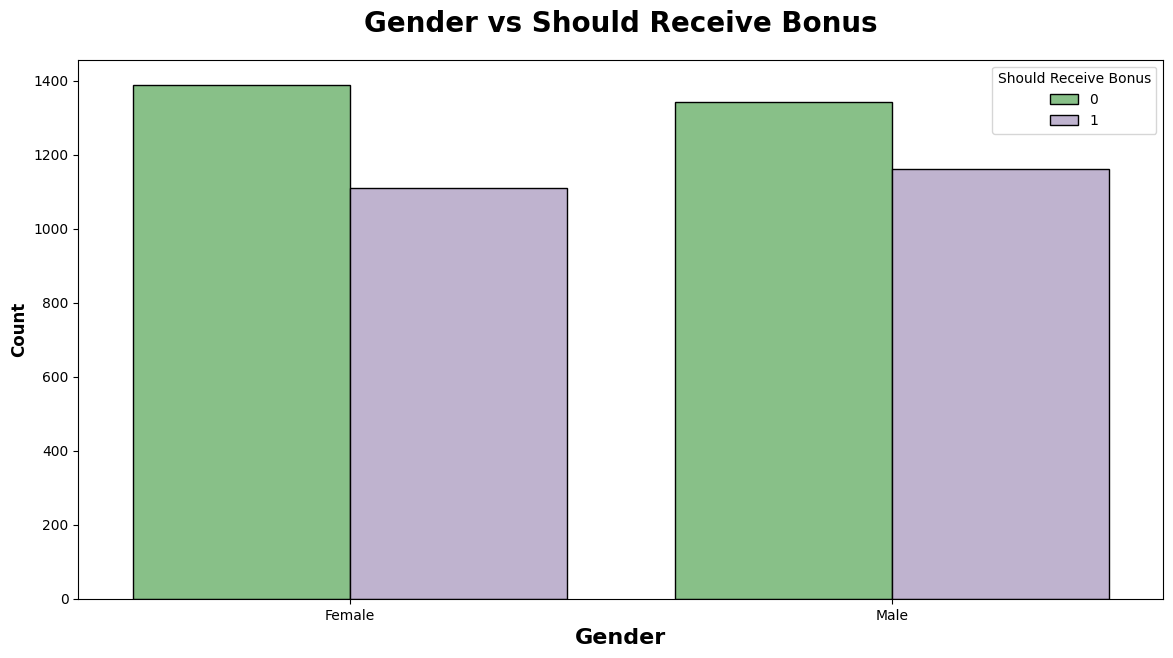

In [514]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Gender",hue="Should_Receive_Bonus", data=data, ec = "black",palette="Accent")
plt.title("Gender vs Should Receive Bonus", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Should Receive Bonus", fancybox=True)
plt.savefig("./images/Gender_vs_Bonus_Receive")
plt.show()

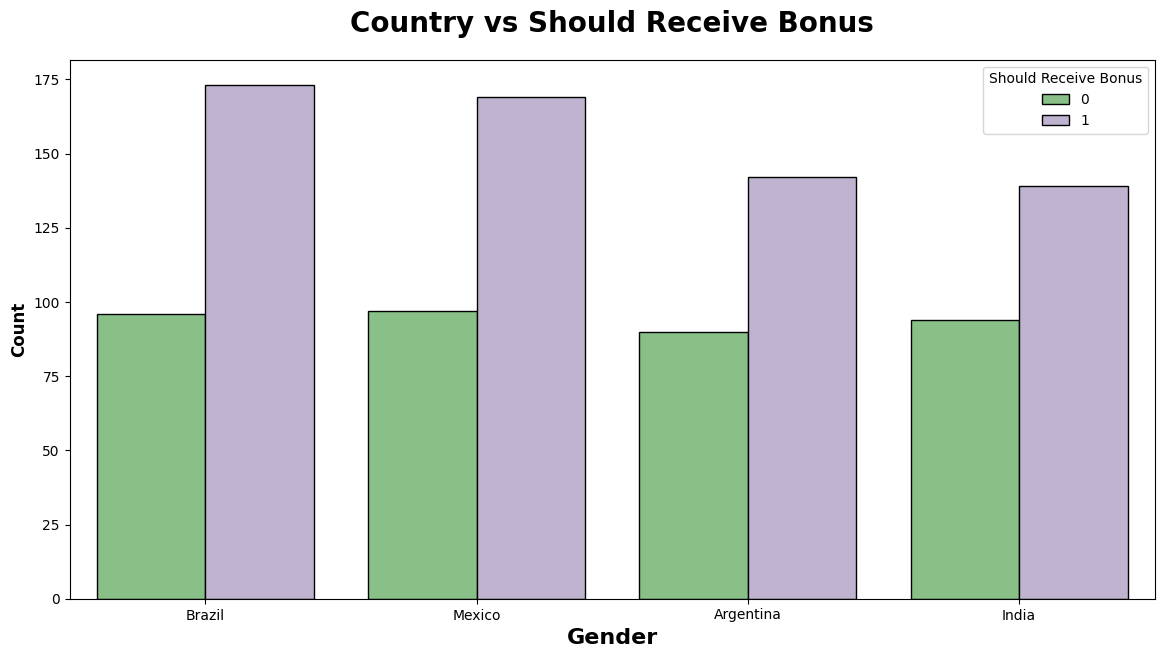

In [293]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Country",hue="Should_Receive_Bonus", data=data, ec = "black",palette="Accent")
plt.title("Country vs Should Receive Bonus", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Should Receive Bonus", fancybox=True)
plt.savefig("./images/Country_vs_Bonus_Receive")
plt.show()

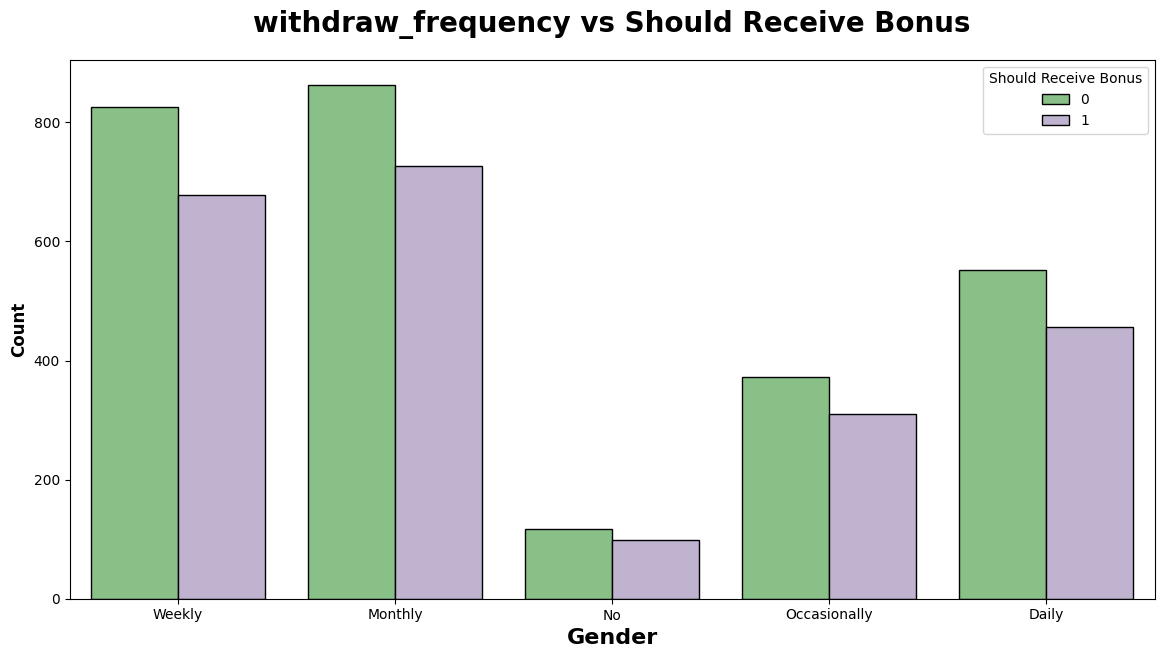

In [515]:
plt.subplots(figsize=(14,7))
sns.countplot(x="withdraw_frequency",hue="Should_Receive_Bonus", data=data, ec = "black",palette="Accent")
plt.title("withdraw_frequency vs Should Receive Bonus", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.legend(title="Should Receive Bonus", fancybox=True)
plt.savefig("./images/withdraw_frequency_vs_Bonus_Receive")
plt.show()

In [516]:
numerical_features

Index(['Age', 'Winning_percentage', 'Days_Since_Last_Bet', 'Income_Level_(k)',
       'Total_Amount_wagered', 'Average_Bet_Amount', 'Active_Days',
       'Total_Number_of_Bets', 'Total_Amount_Wagered',
       'Number_of_Bonuses_Received', 'Amount_of_Bonuses_Received',
       'Revenue_from_Bonuses', 'Increase_in_bets_after_bonus',
       'Increase_in_wagering_after_bonus', 'Should_Receive_Bonus'],
      dtype='object')

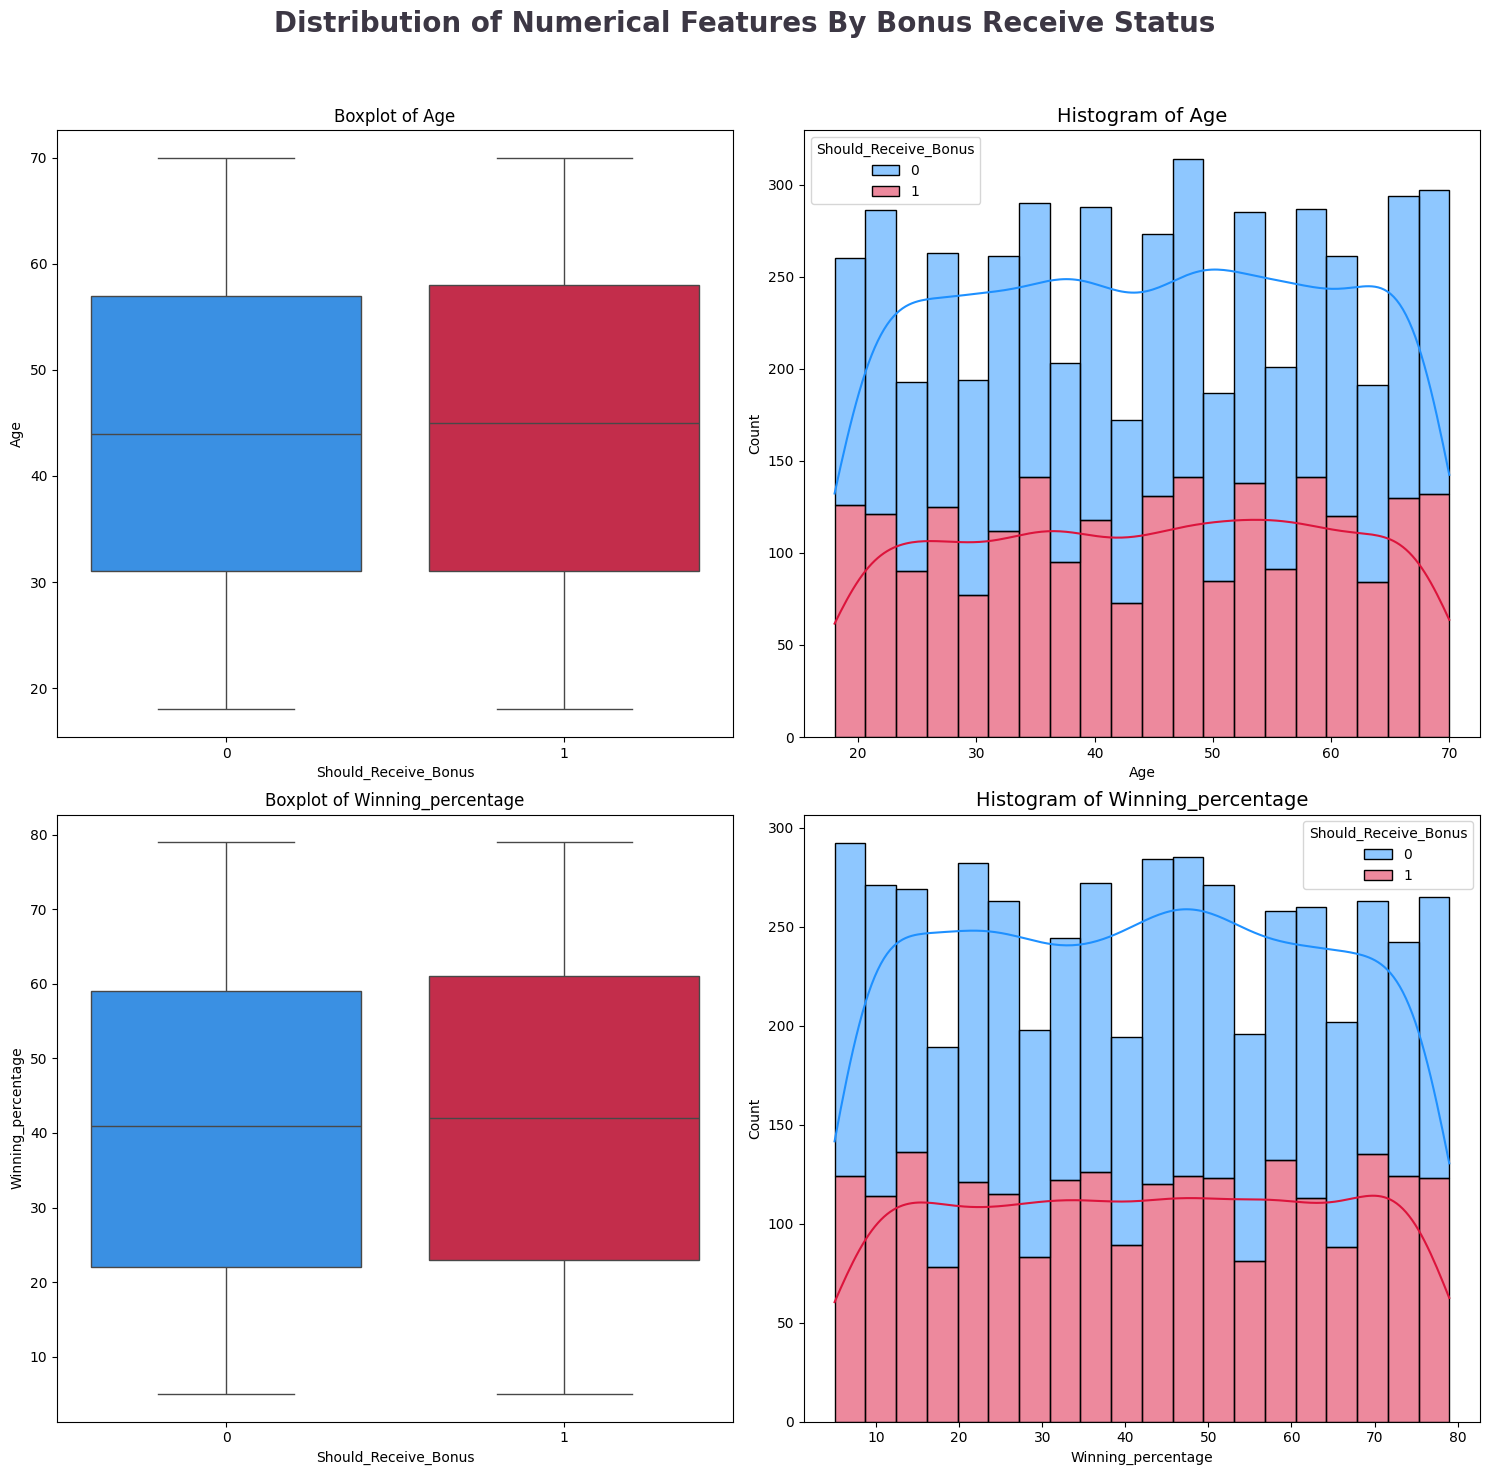

In [519]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distribution of Numerical Features By Bonus Receive Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numerical_features[:2]):   
    sns.boxplot(data=numerical_data, x='Should_Receive_Bonus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=numerical_data, x=col, hue='Should_Receive_Bonus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('./images/Age_And_Winning_percentage_by_Receive_Bonus.png')

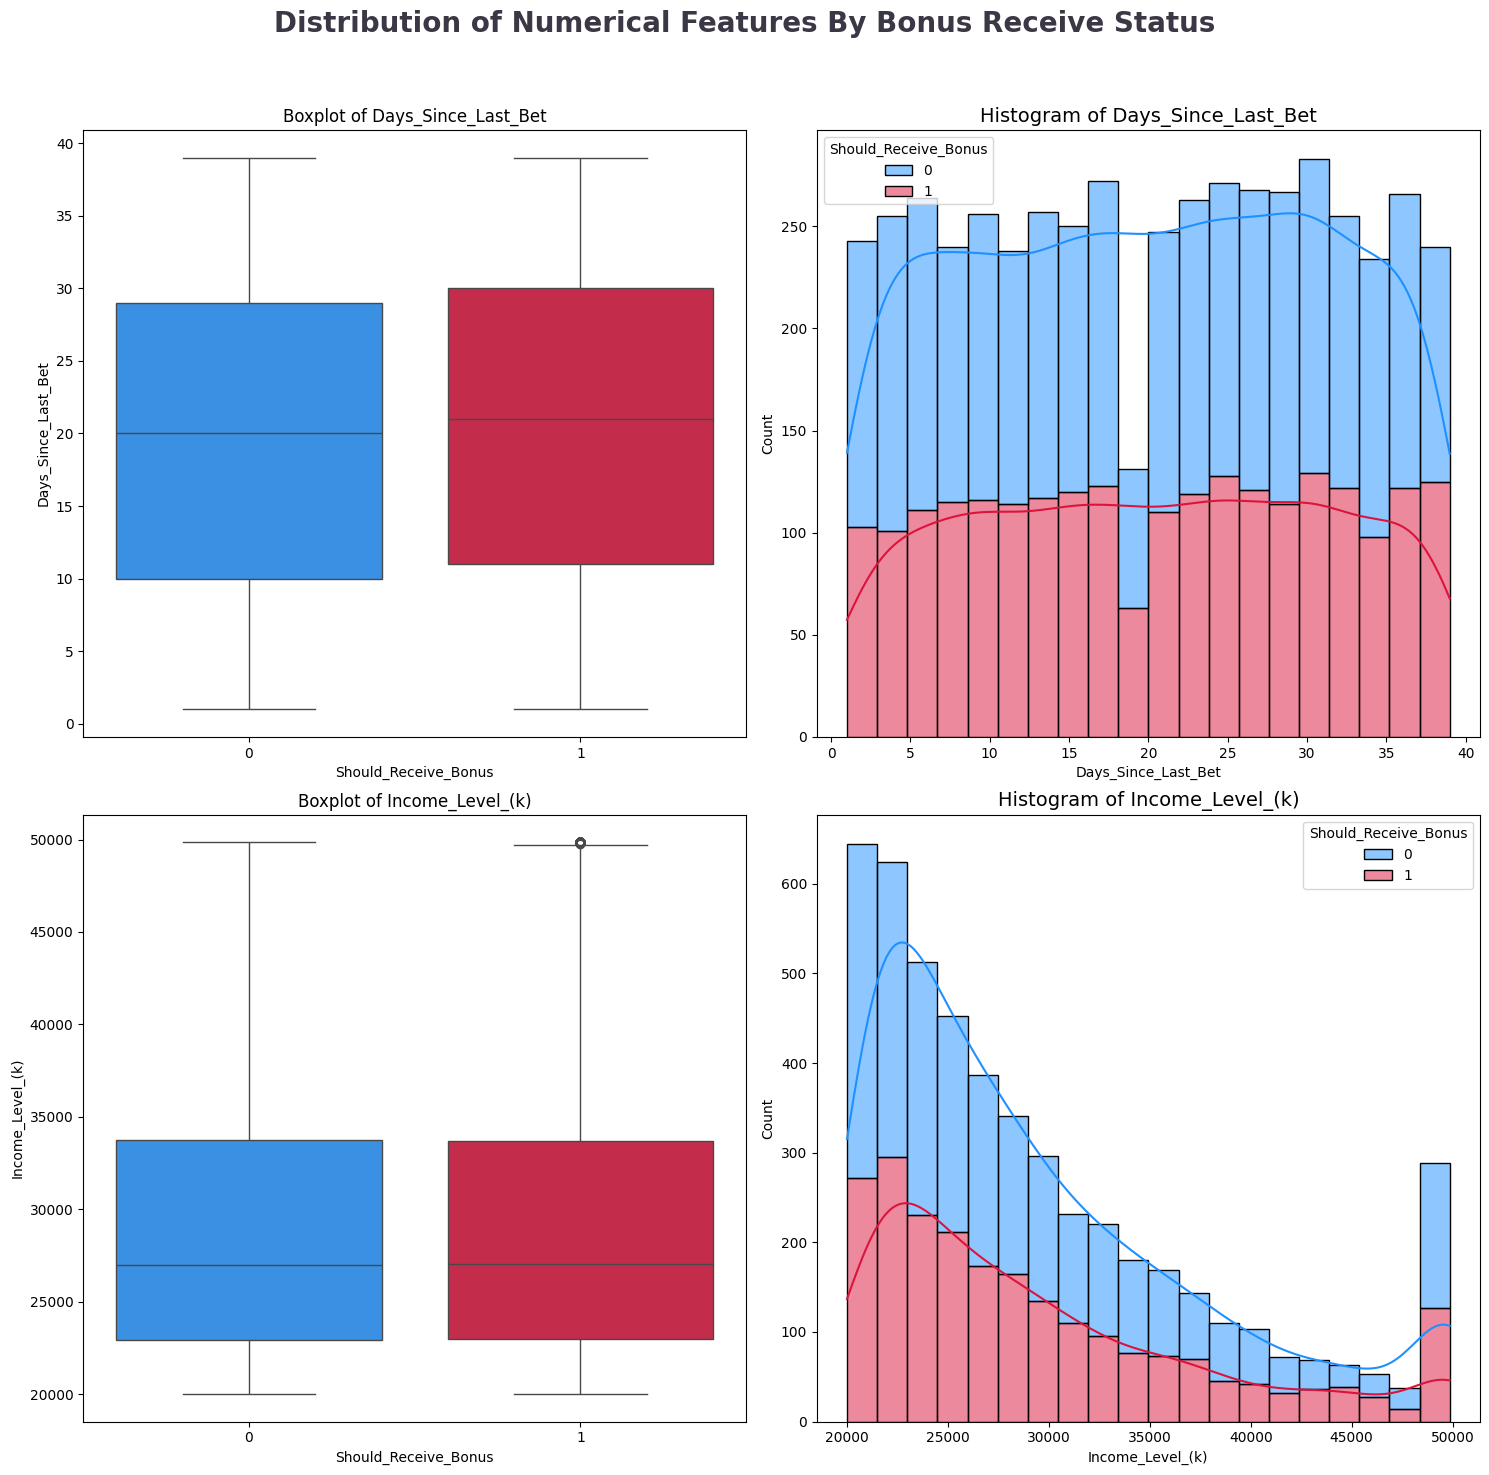

In [520]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distribution of Numerical Features By Bonus Receive Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numerical_features[2:4]):   
    sns.boxplot(data=numerical_data, x='Should_Receive_Bonus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=numerical_data, x=col, hue='Should_Receive_Bonus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('./images/Days_Since_last_And_Income_level_by_Receive_Bonus.png')

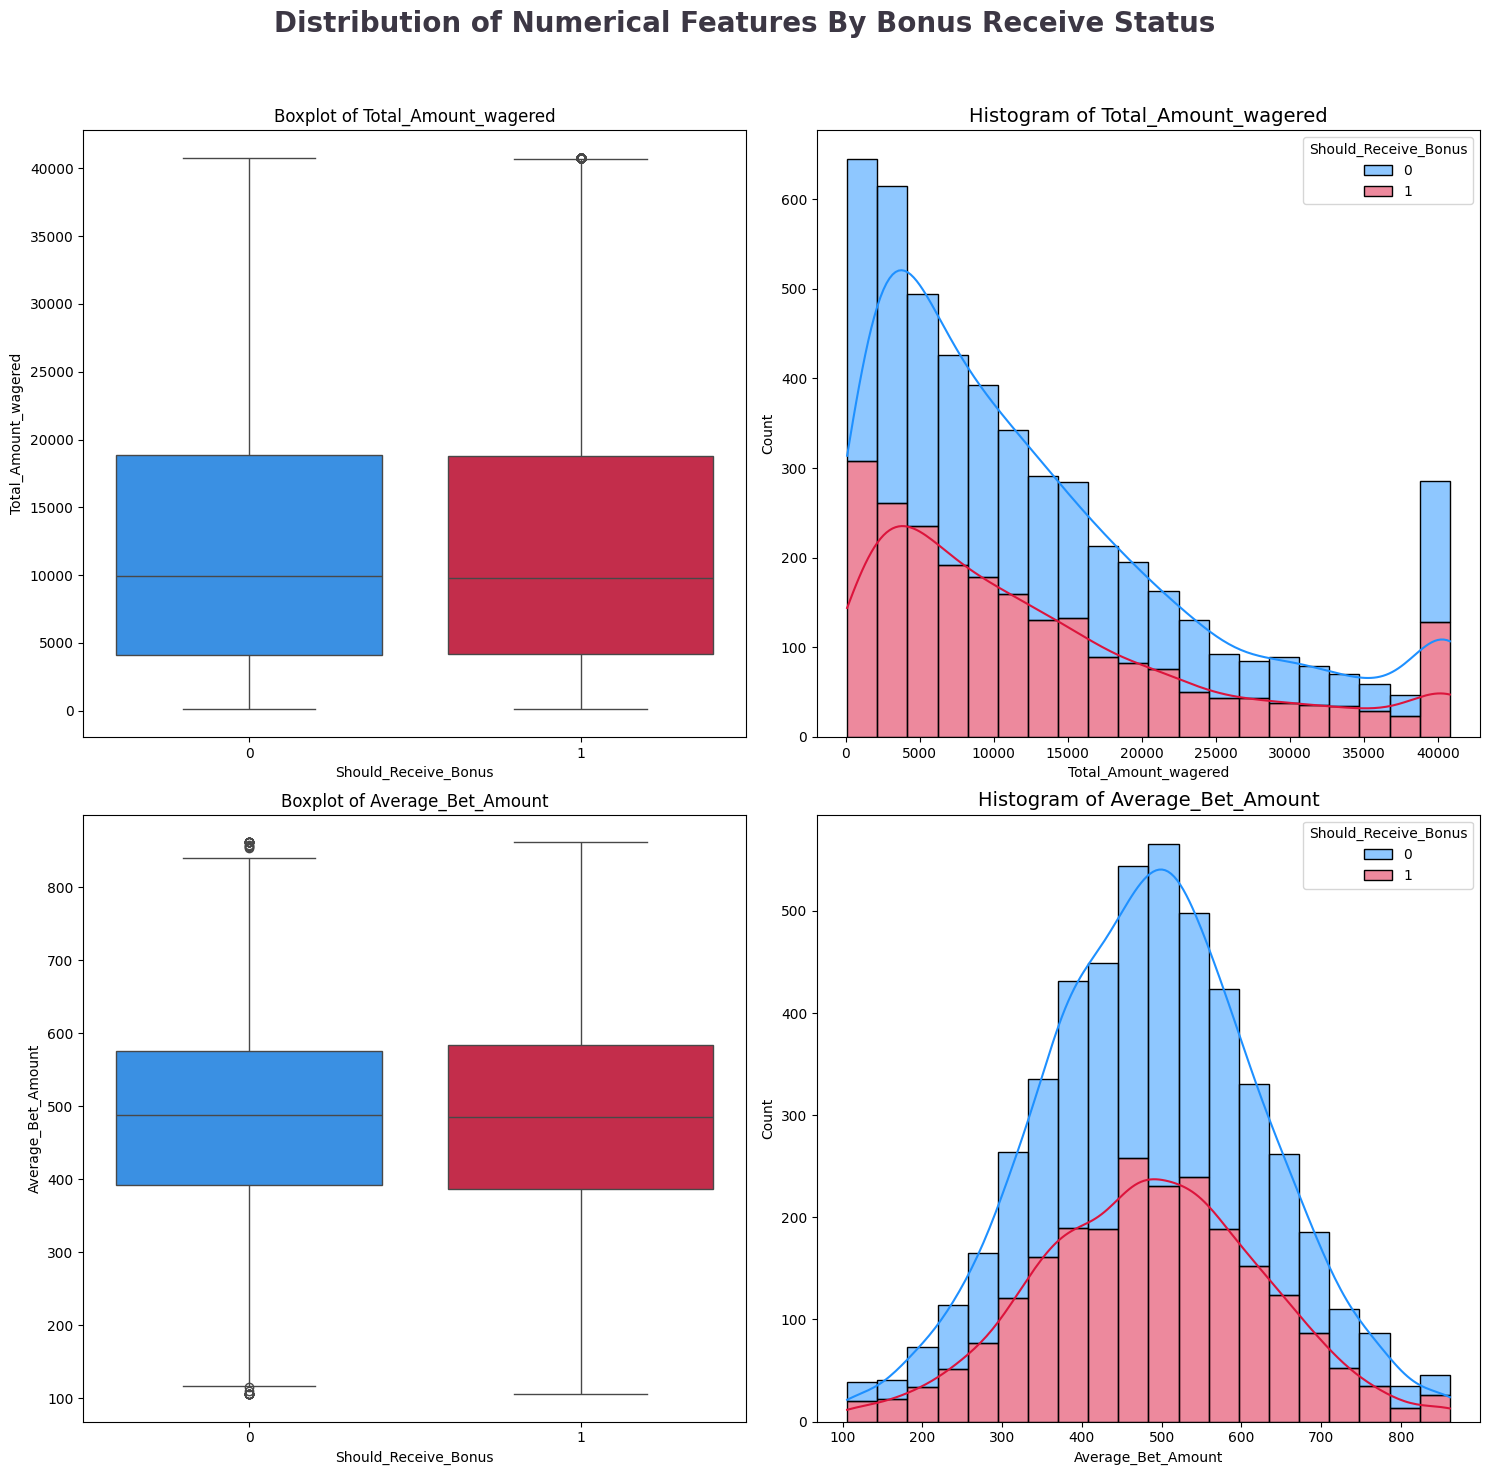

In [518]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distribution of Numerical Features By Bonus Receive Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numerical_features[4:6]):   
    sns.boxplot(data=numerical_data, x='Should_Receive_Bonus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=numerical_data, x=col, hue='Should_Receive_Bonus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('./images/Total_bet_amount_And_Average_bet_amount_by_Receive_Bonus.png')

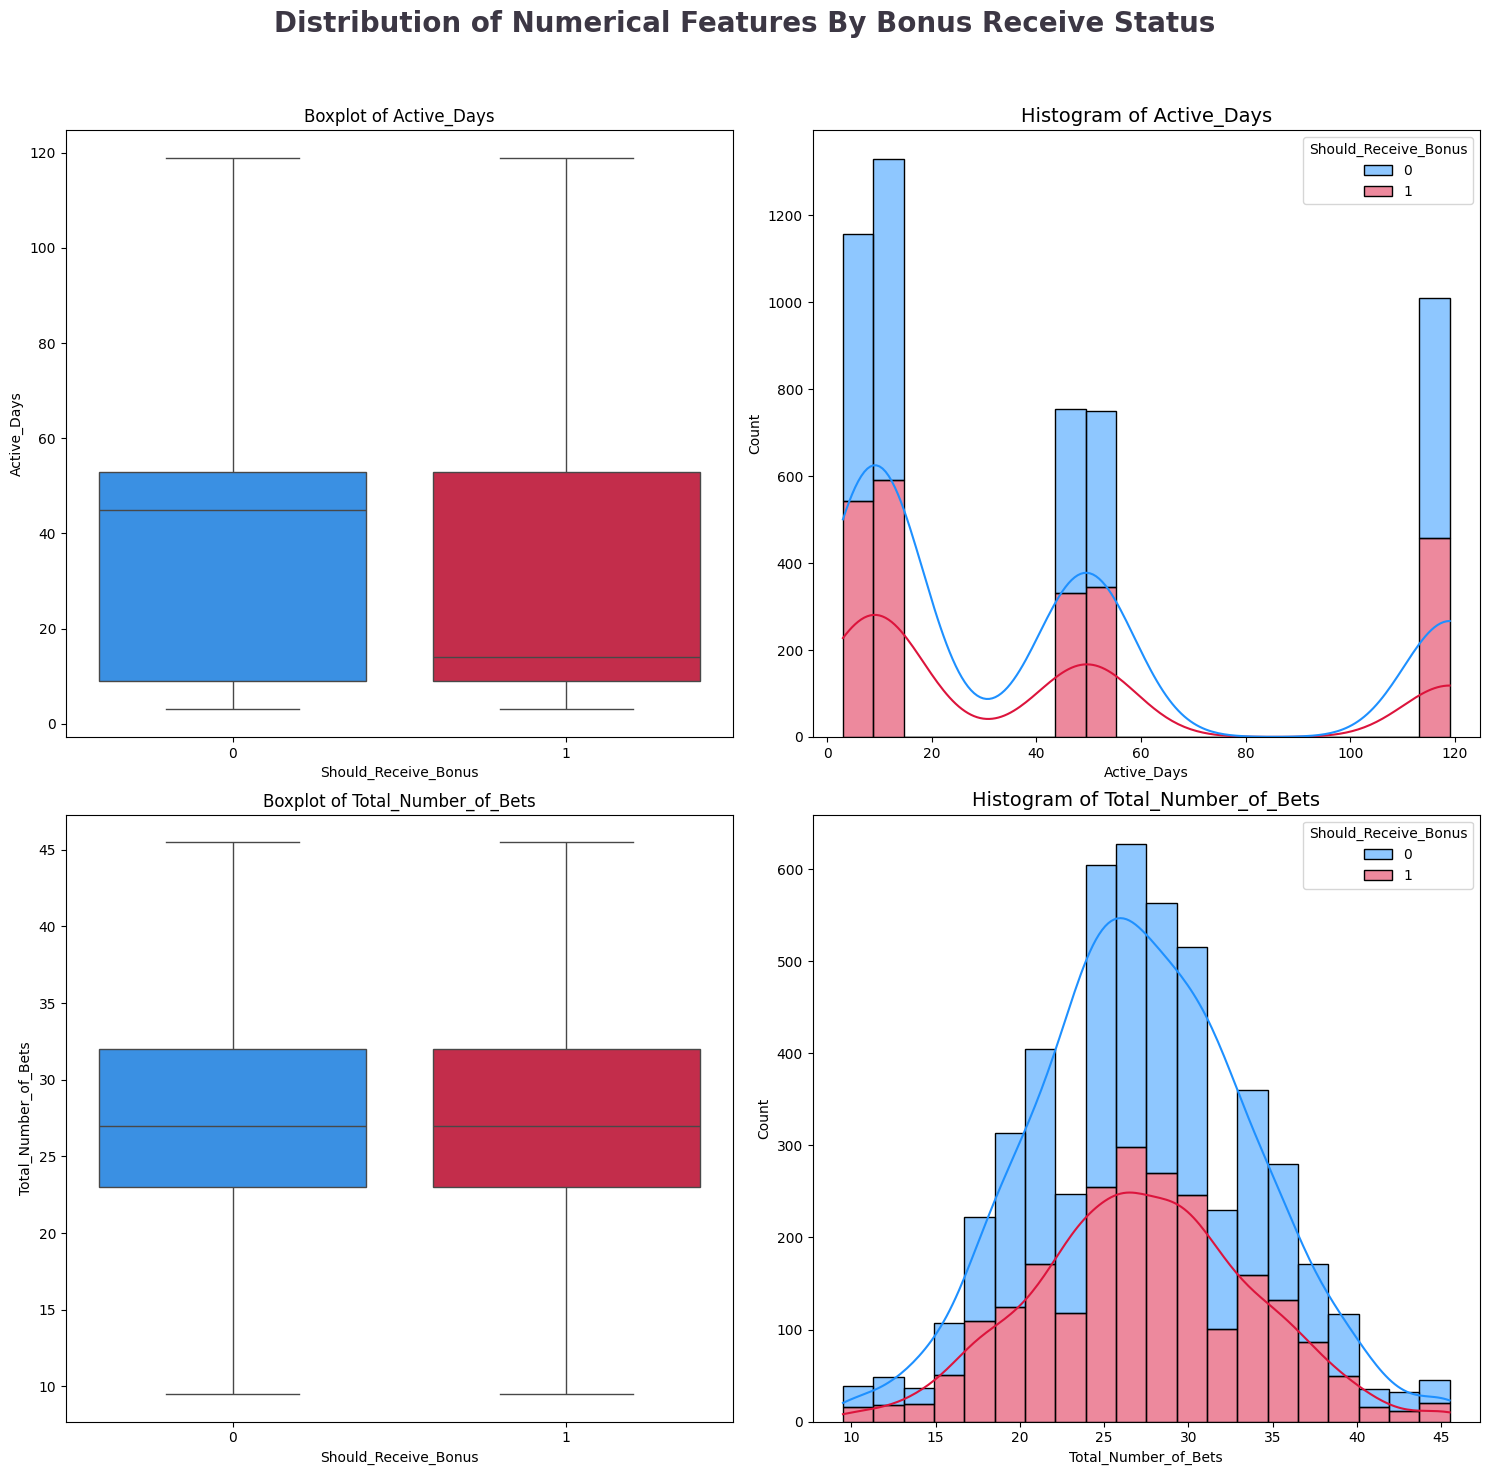

In [521]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distribution of Numerical Features By Bonus Receive Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numerical_features[6:8]):   
    sns.boxplot(data=numerical_data, x='Should_Receive_Bonus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=numerical_data, x=col, hue='Should_Receive_Bonus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('./images/Total_number_of_bets_And_Active_days_by_Receive_Bonus.png')

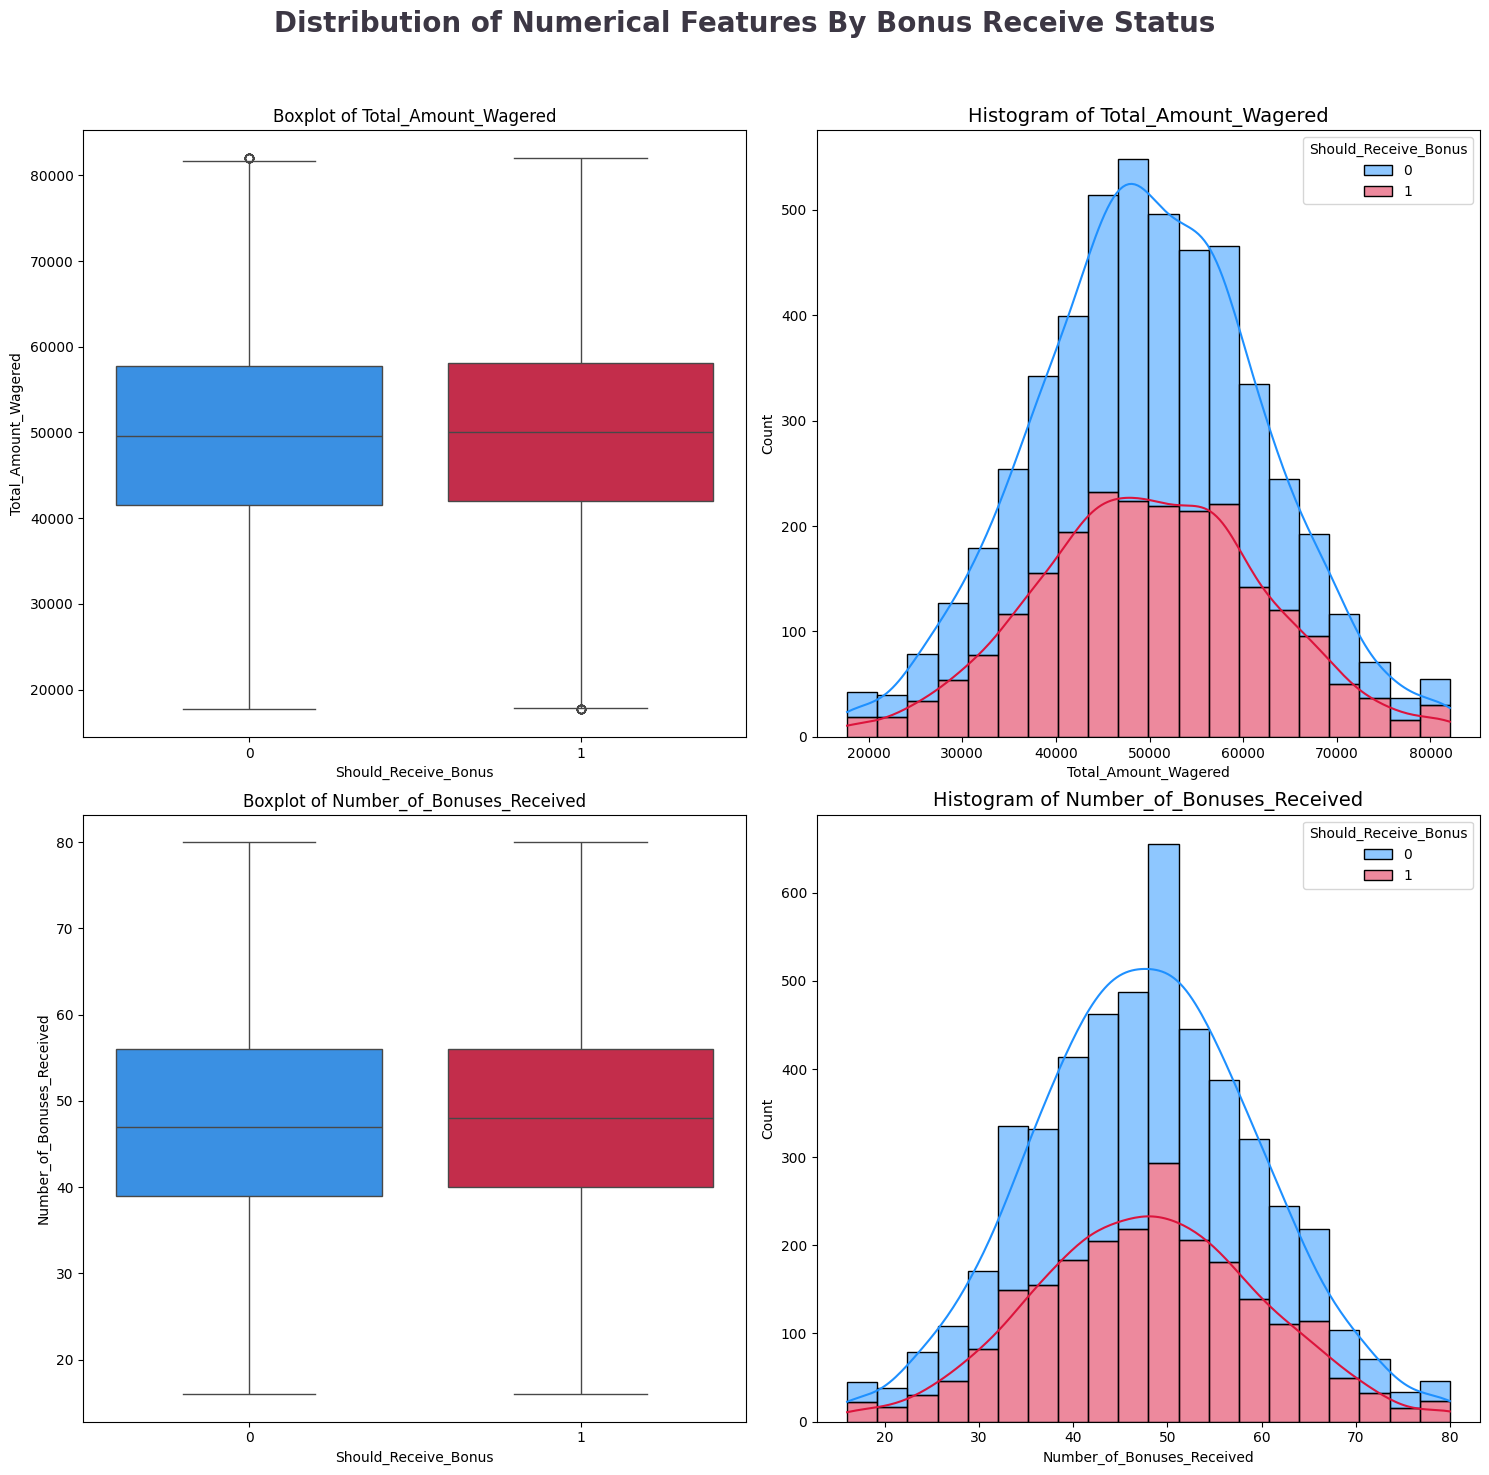

In [522]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distribution of Numerical Features By Bonus Receive Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numerical_features[8:10]):   
    sns.boxplot(data=numerical_data, x='Should_Receive_Bonus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=numerical_data, x=col, hue='Should_Receive_Bonus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('./images/Total_Amount_Wagered_And_Number_of_Bonus_Receive_by_Receive_Bonus.png')

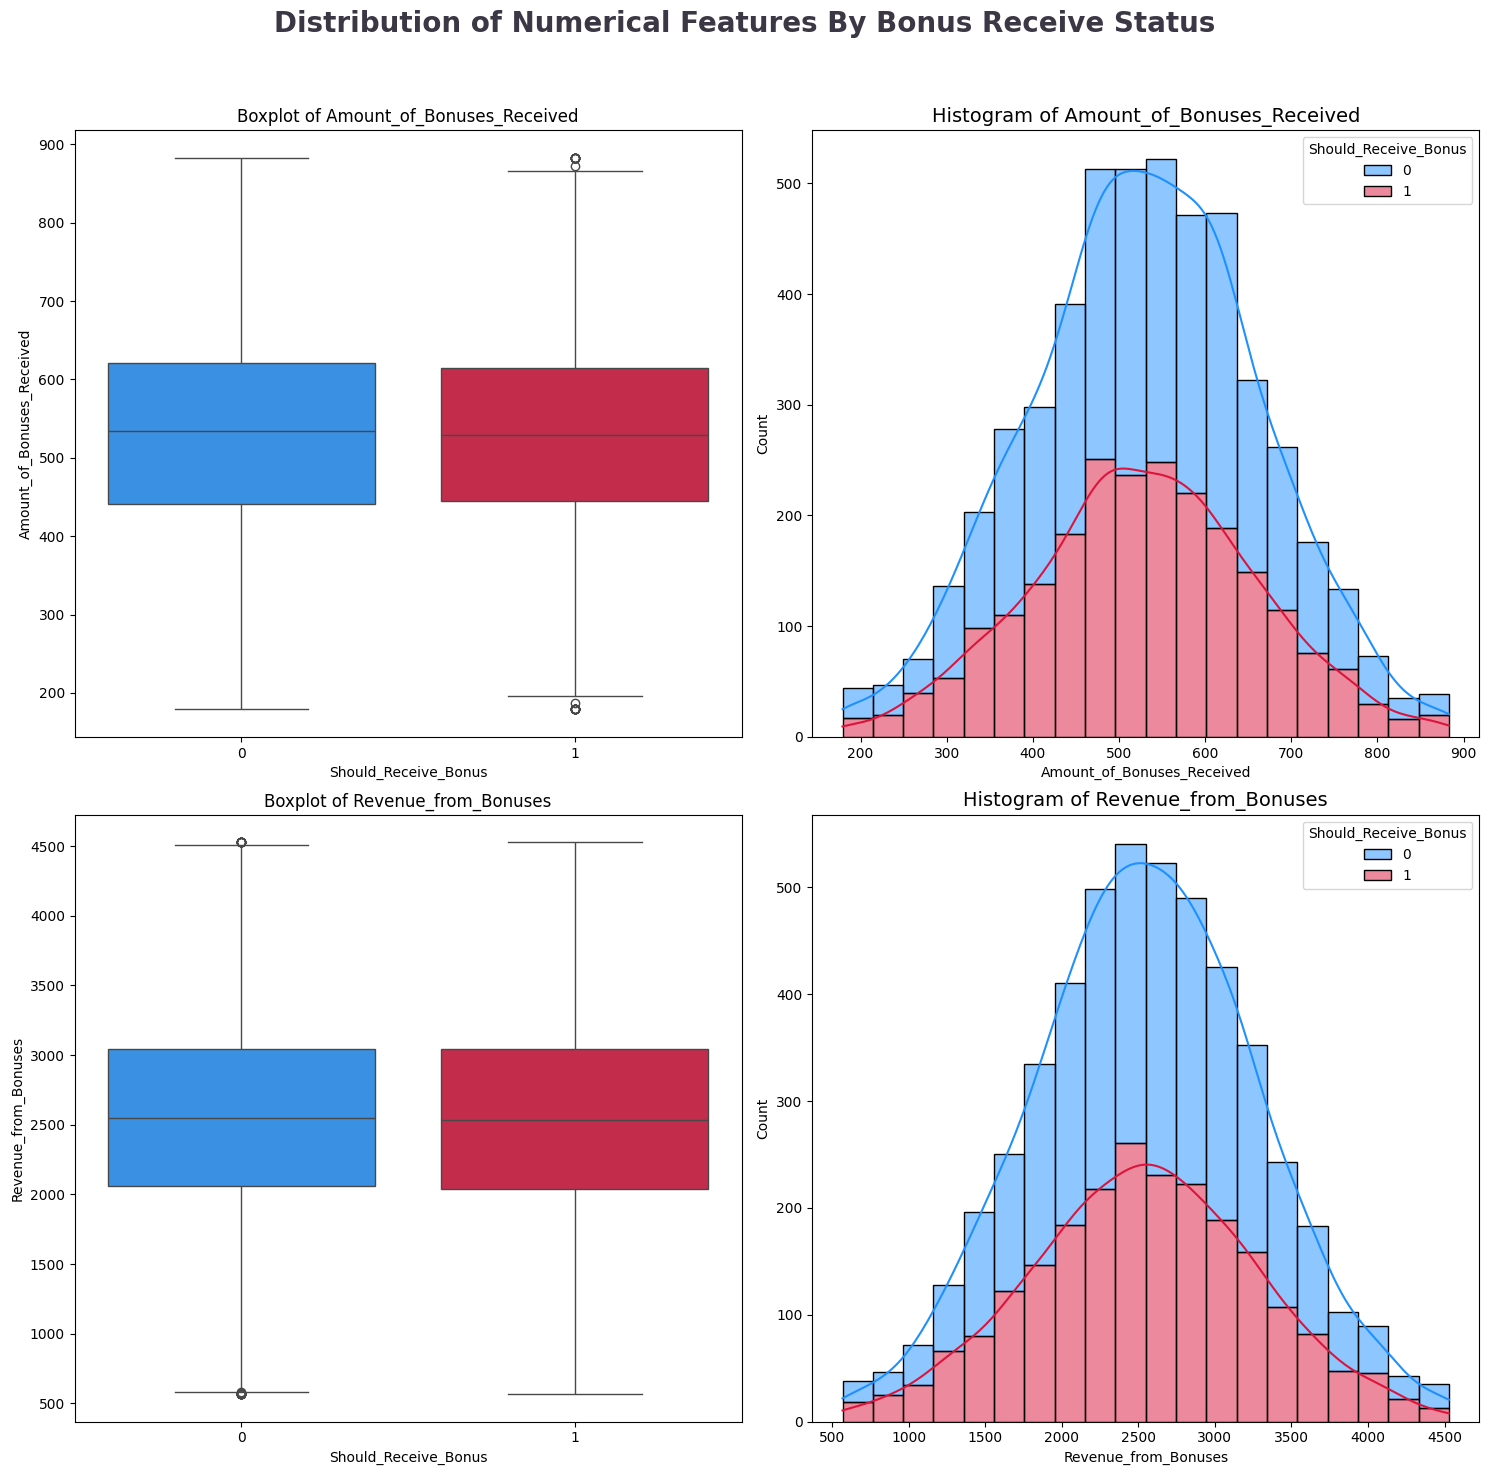

In [523]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distribution of Numerical Features By Bonus Receive Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numerical_features[10:12]):   
    sns.boxplot(data=numerical_data, x='Should_Receive_Bonus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=numerical_data, x=col, hue='Should_Receive_Bonus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('./images/Amount_of_Bonuses_Received_And_Revenue_from_bonus_by_Receive_Bonus.png')

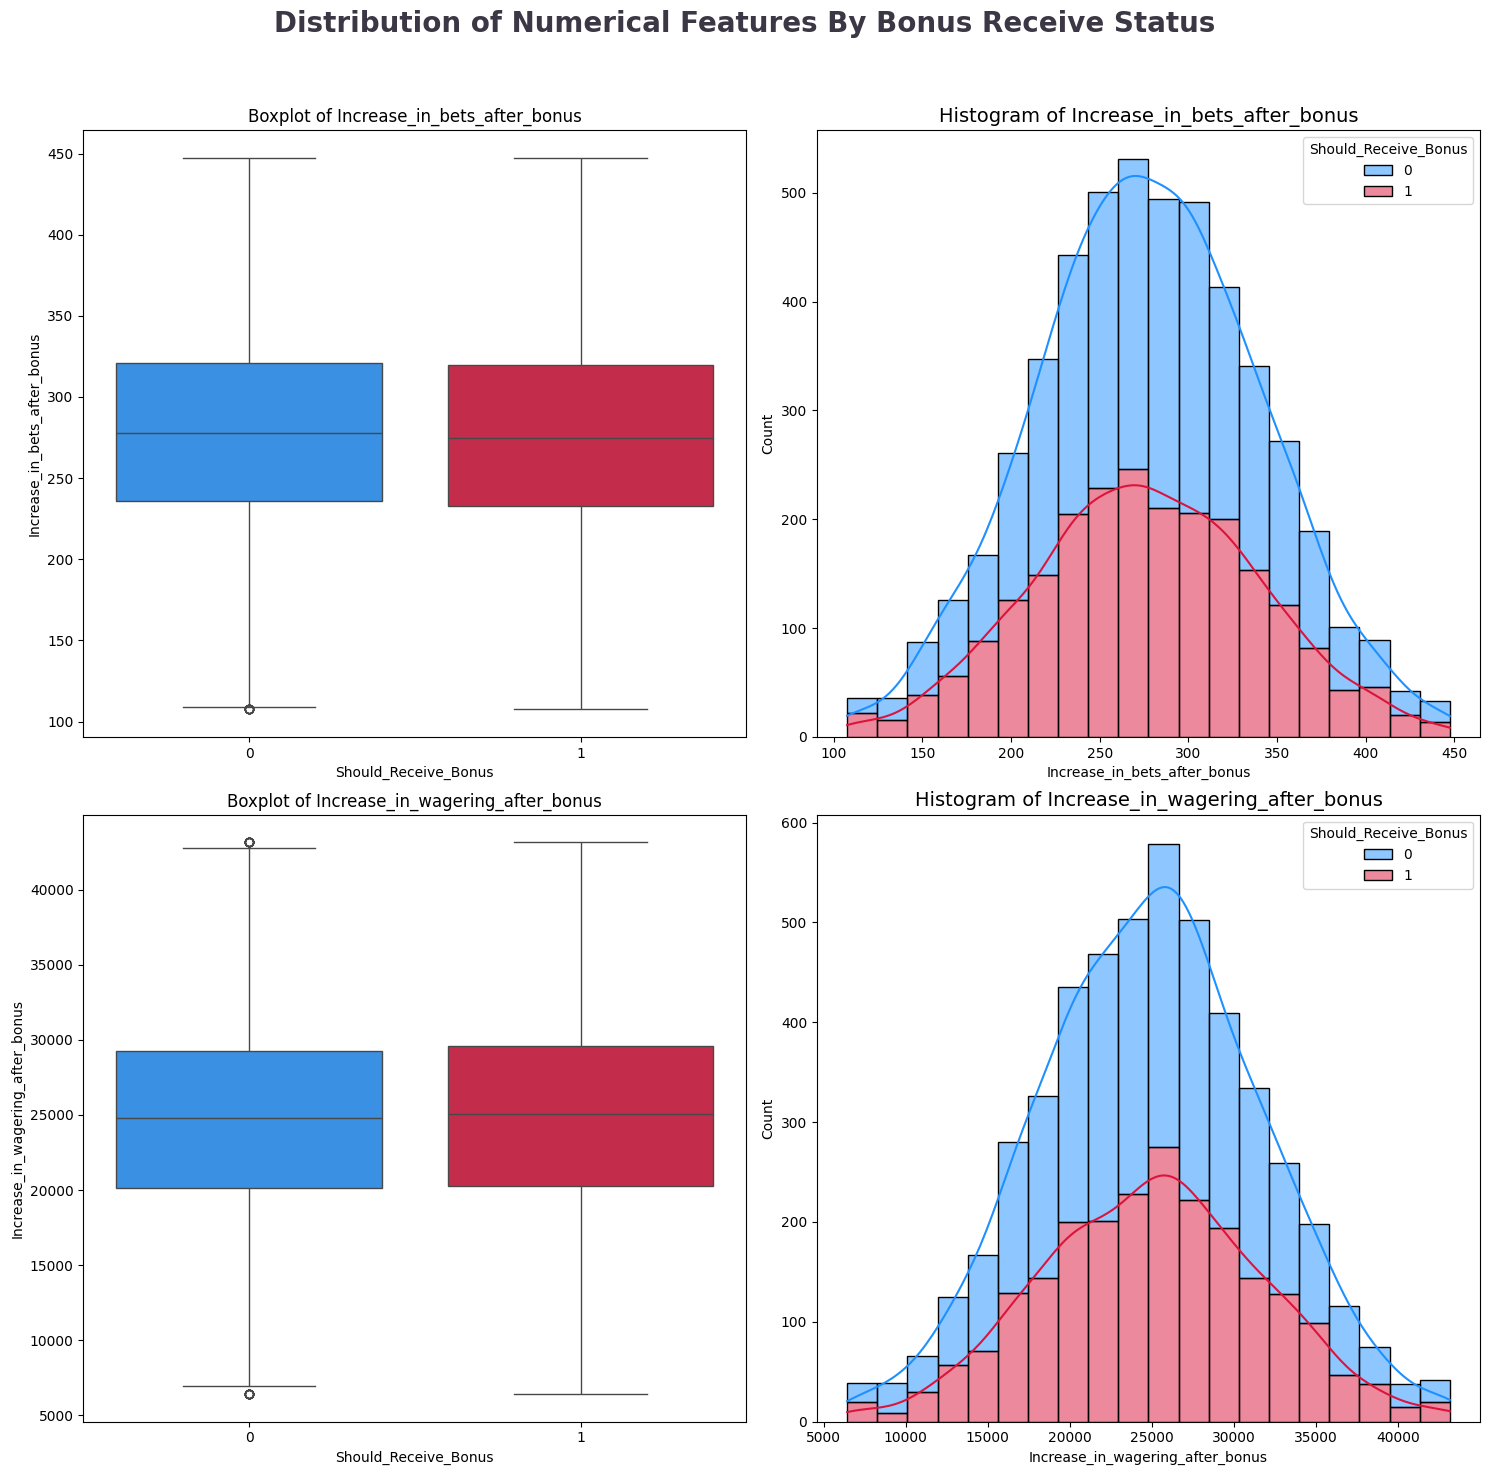

In [524]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Distribution of Numerical Features By Bonus Receive Status', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(numerical_features[12:14]):   
    sns.boxplot(data=numerical_data, x='Should_Receive_Bonus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=numerical_data, x=col, hue='Should_Receive_Bonus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('./images/Increase_in_bets_And_Increase_in_wagering_by_Receive_Bonus.png')

In [557]:
numerical_data_1.iloc[:,:-1].head()

,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus
0,69.0,76.0,3.0,45124.0,4340.0,600.0,49.0,32.0,61621.0,54.0,719.0,4312.0,217.0,20241.0
1,41.0,70.0,7.0,36256.0,30174.0,472.0,50.0,24.0,17698.5,39.0,402.0,4291.0,332.0,16955.0
2,51.0,20.0,5.0,31652.0,7685.0,546.0,54.0,20.0,58136.0,46.0,307.0,2858.0,281.0,25409.0
3,38.0,77.0,19.0,29271.0,844.0,243.0,7.0,32.0,38810.0,37.0,423.0,2534.0,273.0,21905.0
4,51.0,16.0,13.0,44007.0,3476.0,653.0,48.0,29.0,54909.0,48.0,460.0,2200.0,360.0,26404.0


In [558]:
scalar = MinMaxScaler()
scaled_numerical_data = pd.DataFrame(scalar.fit_transform(numerical_data_1.iloc[:,:-1]),columns=numerical_data_1.iloc[:,:-1].columns)

In [559]:
scaled_numerical_data.head()

,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus
0,0.980769,0.959459,0.052632,0.841400,0.104119,0.654101,0.396552,0.625000,0.682323,0.593750,0.767045,0.945374,0.322059,0.376089
1,0.442308,0.878378,0.157895,0.544388,0.739104,0.484788,0.405172,0.402778,0.000000,0.359375,0.316761,0.940072,0.660294,0.286645
2,0.634615,0.202703,0.105263,0.390188,0.186337,0.582672,0.439655,0.291667,0.628185,0.468750,0.181818,0.578295,0.510294,0.516761
3,0.384615,0.972973,0.473684,0.310443,0.018189,0.181878,0.034483,0.625000,0.327961,0.328125,0.346591,0.496497,0.486765,0.421382
4,0.634615,0.148649,0.315789,0.803989,0.082882,0.724206,0.387931,0.541667,0.578054,0.500000,0.399148,0.412175,0.742647,0.543844


In [560]:
categorical_data_1.head()

,Customer_id,First_name,Last_name,Country,Gender,withdraw_frequency
0,606778,Tammy,Robinson,Mexico,Female,Weekly
1,882088,Timothy,Smith,Argentina,Male,Weekly
2,823104,Mary,Mckinney,Mexico,Female,Weekly
3,243455,Sarah,White,India,Female,Monthly
4,485861,Edward,Stephenson,Brazil,Male,Weekly


In [561]:
categorical_data_1["withdraw_frequency"].value_counts()

withdraw_frequency
Monthly         1589
Weekly          1504
Daily           1009
Occasionally     682
No               216
Name: count, dtype: int64

In [562]:
categorical_data_2 = categorical_data_1.drop(columns=["withdraw_frequency"])

In [563]:
categorical_data_2.head()

,Customer_id,First_name,Last_name,Country,Gender
0,606778,Tammy,Robinson,Mexico,Female
1,882088,Timothy,Smith,Argentina,Male
2,823104,Mary,Mckinney,Mexico,Female
3,243455,Sarah,White,India,Female
4,485861,Edward,Stephenson,Brazil,Male


In [570]:
withdraw_frequency_1 = categorical_data_1["withdraw_frequency"].map(mapping)

In [566]:
categorical_data_1["withdraw_frequency"].value_counts()

withdraw_frequency
Monthly         1589
Weekly          1504
Daily           1009
Occasionally     682
No               216
Name: count, dtype: int64

In [581]:
withdraw_frequency_1 = pd.DataFrame(categorical_data_1["withdraw_frequency"],columns=["withdraw_frequency"])

In [582]:
withdraw_frequency_1.head()

,withdraw_frequency
0,Weekly
1,Weekly
2,Weekly
3,Monthly
4,Weekly


In [583]:
mapping = {"No":1,"Occasionally":2,"Daily":3,"Weekly":4,"Monthly":5}

In [584]:
withdraw_frequency_2 = withdraw_frequency_1["withdraw_frequency"].map(mapping)

In [591]:
withdraw_frequency_2 = pd.DataFrame(withdraw_frequency_2,columns = ["withdraw_frequency"])

In [593]:
scalar = MinMaxScaler()
withdraw_frequency_3 = pd.DataFrame(scalar.fit_transform(withdraw_frequency_2),columns=["Withdraw_frequency"])

In [594]:
withdraw_frequency_3.head()

,Withdraw_frequency
0,0.75
1,0.75
2,0.75
3,1.00
4,0.75


In [595]:
withdraw_frequency_3.value_counts()

Withdraw_frequency
1.00                  1589
0.75                  1504
0.50                  1009
0.25                   682
0.00                   216
Name: count, dtype: int64

In [598]:
categorical_data_2.head()

,Customer_id,First_name,Last_name,Country,Gender
0,606778,Tammy,Robinson,Mexico,Female
1,882088,Timothy,Smith,Argentina,Male
2,823104,Mary,Mckinney,Mexico,Female
3,243455,Sarah,White,India,Female
4,485861,Edward,Stephenson,Brazil,Male


In [599]:
scaled_numerical_data.head()

,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus
0,0.980769,0.959459,0.052632,0.841400,0.104119,0.654101,0.396552,0.625000,0.682323,0.593750,0.767045,0.945374,0.322059,0.376089
1,0.442308,0.878378,0.157895,0.544388,0.739104,0.484788,0.405172,0.402778,0.000000,0.359375,0.316761,0.940072,0.660294,0.286645
2,0.634615,0.202703,0.105263,0.390188,0.186337,0.582672,0.439655,0.291667,0.628185,0.468750,0.181818,0.578295,0.510294,0.516761
3,0.384615,0.972973,0.473684,0.310443,0.018189,0.181878,0.034483,0.625000,0.327961,0.328125,0.346591,0.496497,0.486765,0.421382
4,0.634615,0.148649,0.315789,0.803989,0.082882,0.724206,0.387931,0.541667,0.578054,0.500000,0.399148,0.412175,0.742647,0.543844


In [600]:
numerical_data_1.head()

,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),Total_Amount_wagered,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus,Should_Receive_Bonus
0,69.0,76.0,3.0,45124.0,4340.0,600.0,49.0,32.0,61621.0,54.0,719.0,4312.0,217.0,20241.0,0.0
1,41.0,70.0,7.0,36256.0,30174.0,472.0,50.0,24.0,17698.5,39.0,402.0,4291.0,332.0,16955.0,0.0
2,51.0,20.0,5.0,31652.0,7685.0,546.0,54.0,20.0,58136.0,46.0,307.0,2858.0,281.0,25409.0,0.0
3,38.0,77.0,19.0,29271.0,844.0,243.0,7.0,32.0,38810.0,37.0,423.0,2534.0,273.0,21905.0,1.0
4,51.0,16.0,13.0,44007.0,3476.0,653.0,48.0,29.0,54909.0,48.0,460.0,2200.0,360.0,26404.0,1.0


In [601]:
final_clean_data = pd.concat([categorical_data_2,withdraw_frequency_3,scaled_numerical_data,numerical_data_1.iloc[:,-1]],axis=1)

In [602]:
final_clean_data.head()

,Customer_id,First_name,Last_name,Country,Gender,Withdraw_frequency,Age,Winning_percentage,Days_Since_Last_Bet,Income_Level_(k),...,Average_Bet_Amount,Active_Days,Total_Number_of_Bets,Total_Amount_Wagered,Number_of_Bonuses_Received,Amount_of_Bonuses_Received,Revenue_from_Bonuses,Increase_in_bets_after_bonus,Increase_in_wagering_after_bonus,Should_Receive_Bonus
0,606778,Tammy,Robinson,Mexico,Female,0.75,0.980769,0.959459,0.052632,0.841400,...,0.654101,0.396552,0.625000,0.682323,0.593750,0.767045,0.945374,0.322059,0.376089,0.0
1,882088,Timothy,Smith,Argentina,Male,0.75,0.442308,0.878378,0.157895,0.544388,...,0.484788,0.405172,0.402778,0.000000,0.359375,0.316761,0.940072,0.660294,0.286645,0.0
2,823104,Mary,Mckinney,Mexico,Female,0.75,0.634615,0.202703,0.105263,0.390188,...,0.582672,0.439655,0.291667,0.628185,0.468750,0.181818,0.578295,0.510294,0.516761,0.0
3,243455,Sarah,White,India,Female,1.00,0.384615,0.972973,0.473684,0.310443,...,0.181878,0.034483,0.625000,0.327961,0.328125,0.346591,0.496497,0.486765,0.421382,1.0
4,485861,Edward,Stephenson,Brazil,Male,0.75,0.634615,0.148649,0.315789,0.803989,...,0.724206,0.387931,0.541667,0.578054,0.500000,0.399148,0.412175,0.742647,0.543844,1.0


In [603]:
final_clean_data.shape

(5000, 21)

In [607]:
final_clean_data.columns

Index(['Customer_id', 'First_name', 'Last_name', 'Country', 'Gender',
       'Withdraw_frequency', 'Age', 'Winning_percentage',
       'Days_Since_Last_Bet', 'Income_Level_(k)', 'Total_Amount_wagered',
       'Average_Bet_Amount', 'Active_Days', 'Total_Number_of_Bets',
       'Total_Amount_Wagered', 'Number_of_Bonuses_Received',
       'Amount_of_Bonuses_Received', 'Revenue_from_Bonuses',
       'Increase_in_bets_after_bonus', 'Increase_in_wagering_after_bonus',
       'Should_Receive_Bonus'],
      dtype='object')

In [605]:
project_data_final = "final_clean_data.csv"

In [606]:
final_clean_data.to_csv(project_data_final,index=False)